In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Business Understanding

Medical turnover, or the turnover of healthcare professionals, represents a significant problem for hospitals. High turnover not only increases operational costs but also compromises the continuity of patient care and employee morale. The loss of experienced professionals results in a learning curve for new hires, potentially affecting the quality of care. For hospital managers, understanding and predicting turnover is crucial for implementing strategies that can mitigate this phenomenon.

# 2. Data Exploration

## Loading Data and Exploratory Analysis



In [2]:
import pandas as pd

# Path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/watson_healthcare_modified.csv'


# Reading the CSV file
abt_00 = pd.read_csv(file_path)




In [3]:
abt_00.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Transforming the 'Attrition' column
abt_00['Attrition'] = abt_00['Attrition'].map({'Yes': 1, 'No': 0})

abt_00.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


# 3. Data Preparation

In [ ]:
# Displaying the shape of the DataFrame
# I printed the shape (number of rows and columns) of the DataFrame to understand the dimensions of the dataset.
print(f'The number of rows in the file is: {abt_00.shape[0]}')
print(f'The number of columns in the file is: {abt_00.shape[1]}')

The number of rows in the file is: 1676
The number of columns in the file is: 35


In [ ]:
#Visualizing the columns of the file
print('Columns present in the file:')
print(abt_00.columns)

Columns present in the file:
Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# Type of Each Column
abt_00.dtypes

EmployeeID                   int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

In [ ]:
# Checking unique values ​​per column
[print(column+' it has '+str(abt_00[column].nunique())+' unique values') for column in abt_00.columns];

EmployeeID it has 1676 unique values
Age it has 43 unique values
Attrition it has 2 unique values
BusinessTravel it has 3 unique values
DailyRate it has 886 unique values
Department it has 3 unique values
DistanceFromHome it has 29 unique values
Education it has 5 unique values
EducationField it has 6 unique values
EmployeeCount it has 1 unique values
EnvironmentSatisfaction it has 4 unique values
Gender it has 2 unique values
HourlyRate it has 71 unique values
JobInvolvement it has 4 unique values
JobLevel it has 5 unique values
JobRole it has 5 unique values
JobSatisfaction it has 4 unique values
MaritalStatus it has 3 unique values
MonthlyIncome it has 1349 unique values
MonthlyRate it has 1427 unique values
NumCompaniesWorked it has 10 unique values
Over18 it has 1 unique values
OverTime it has 2 unique values
PercentSalaryHike it has 15 unique values
PerformanceRating it has 2 unique values
RelationshipSatisfaction it has 4 unique values
StandardHours it has 1 unique values
Shift 

In [ ]:
# Checking for possible duplicate lines
abt_00.duplicated().sum()

0

In [ ]:
# Checking for possible missing values
abt_00.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 4. Data Analysis

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=053d5a6cd22a7ce58f2697a1b7e72c6fd1e045e518a90e6e266a5e0480ecc221
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(abt_00, title='Medical_Turnover')

# Exporting to HTML
profile.to_file('/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/turnover.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

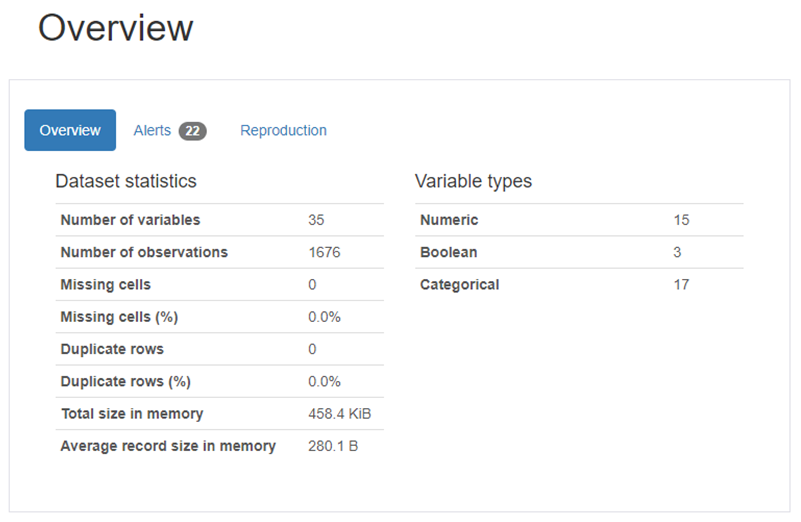

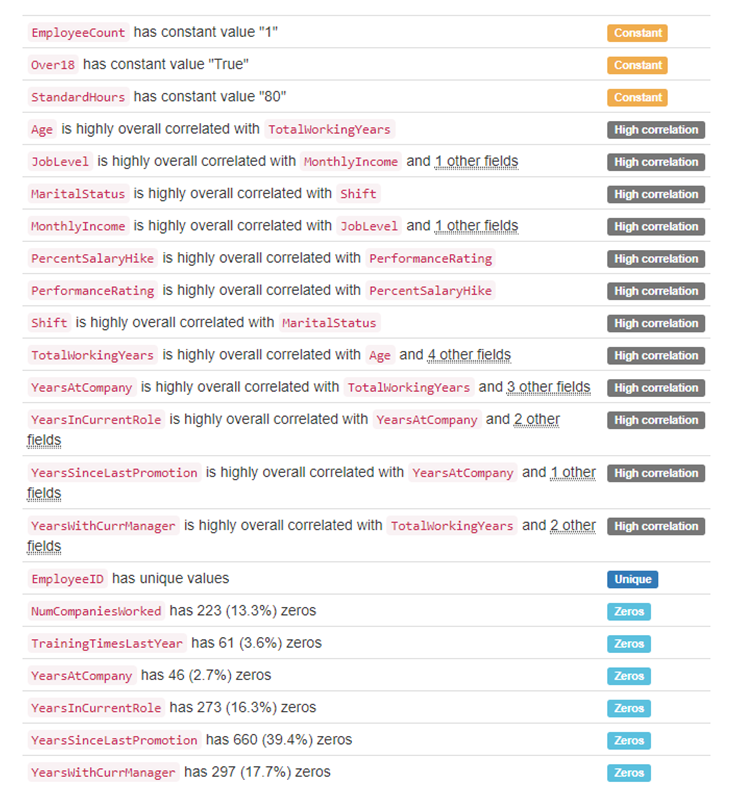

## Descriptive statistics

In [ ]:
import pandas as pd

def describe(df):
    # Use describe to get basic statistics
    desc = df.describe().T

    # Calculates skewness for numeric columns only
    numeric_cols = df.select_dtypes(include='number').columns
    desc['skew'] = df[numeric_cols].skew()

    # Calculates kurtosis and adjusts for excess kurtosis for numeric columns
    desc['kurtosis'] = df[numeric_cols].kurtosis() - 3

    # Calculates the median for numeric columns
    desc['median'] = df[numeric_cols].median()

    # Calculates the range for numeric columns
    desc['range'] = df[numeric_cols].max() - df[numeric_cols].min()

    # Reorder columns for better viewing
    columns_order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median', 'range', 'skew', 'kurtosis']
    desc = desc[columns_order]

    return desc

In [ ]:
abt_describe = describe(abt_00)
abt_describe


,count,mean,std,min,25%,50%,75%,max,median,range,skew,kurtosis
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0,1464606.0,861201,-0.008995,-4.206558
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0,36.0,42,0.419614,-3.428090
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0,796.5,1397,0.003889,-4.201299
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0,7.0,28,0.953314,-3.251710
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0,3.0,4,-0.279411,-3.557846
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0,1.0,0,0.000000,-3.000000
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0,3.0,3,-0.313217,-4.218306
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0,65.5,70,-0.008805,-4.199436
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0,3.0,3,-0.487887,-2.760194
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0,2.0,4,1.026815,-2.617370


## General Conclusions

1. Data Symmetry
* Most variables have skewness close to zero, indicating a relatively symmetric distribution. However, some variables like DistanceFromHome, JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, and PerformanceRating have positive skewness, indicating right-skewed asymmetry, which means there are some high extreme values.
* Variables such as Education, JobInvolvement, JobSatisfaction, and WorkLifeBalance have negative skewness, indicating left-skewed asymmetry, with some low extreme values.

2. Data Kurtosis
* Most variables show negative kurtosis values (less than 0), indicating that the distributions are less concentrated than a normal distribution, with lighter tails.
* Only YearsAtCompany and YearsSinceLastPromotion show positive kurtosis values, suggesting higher concentration around the mean and heavier tails.

3. Value Range
* The MonthlyIncome variable has an extremely high range (18990), reflecting the high variability in employee salaries.
* YearsAtCompany and TotalWorkingYears also show wide ranges (40), indicating significant diversity in employment duration and employee experience.
* EmployeeCount and StandardHours have null ranges, showing that they are constant and uniform across all records.

4. Specific Distributions
* The PerformanceRating variable has a skewness of 1.96, suggesting strong right-skewed asymmetry, with most employees receiving a high performance rating.
* JobLevel and NumCompaniesWorked also show notable right-skewed asymmetry, indicating that most employees are at lower job levels and have worked for fewer companies.



In [19]:
df = abt_00

In [20]:
df.shape

(1676, 35)

In [21]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## Removing EmployeeID (identification variable will not affect the model)

In [22]:
df = df.drop('EmployeeID', axis=1)
df.shape


(1676, 34)

In [23]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


## Data Segmentation

### Clustering Segmentation (K-means)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import f_oneway


# Automatically select relevant numerical and categorical columns for clustering
numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
categorical_features = df.select_dtypes(include=[object]).columns.to_list()

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[numeric_features])

# Analyze cluster characteristics
for cluster_num in df['cluster'].unique():
    print(f"Cluster {cluster_num} Analysis")
    cluster_data = df[df['cluster'] == cluster_num]

    # Display statistics for numeric features
    print("Numeric Features:")
    print(cluster_data[numeric_features].describe())

    # Display frequency and proportions for categorical features
    print("Categorical Features:")
    for col in categorical_features:
        print(f"{col} distribution in Cluster {cluster_num}:")
        print(cluster_data[col].value_counts(normalize=True))
    print("-" * 50)

# Centroid analysis
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=numeric_features)
print("Cluster Centroids:")
print(centroids_df)

# Comparison between clusters
cluster_means = df.groupby('cluster')[numeric_features].mean()
print("Cluster Means Comparison:")
print(cluster_means)

# Analysis of Variance (ANOVA)
for col in numeric_features:
    clusters = [df[df['cluster'] == cluster_num][col] for cluster_num in df['cluster'].unique()]
    f_val, p_val = f_oneway(*clusters)
    print(f"ANOVA for {col}: F-value = {f_val}, p-value = {p_val}")

# Export results to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/cluster_analysis_results.csv', index=False)
print("Cluster analysis results exported to 'cluster_analysis_results.csv'")


Cluster 1 Analysis
Numeric Features:
       EmployeeID    Age  DailyRate  DistanceFromHome  Education  \
count      595.00 595.00     595.00            595.00     595.00   
mean   1176900.97  37.36     799.99              9.54       2.90   
std      85397.99   9.34     410.49              8.11       1.04   
min    1025177.00  18.00     102.00              1.00       1.00   
25%    1107438.50  31.00     461.50              2.00       2.00   
50%    1178013.00  36.00     793.00              7.00       3.00   
75%    1248209.50  44.00    1169.50             15.00       4.00   
max    1324348.00  60.00    1499.00             29.00       5.00   

       EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         595.00                   595.00      595.00          595.00   
mean            1.00                     2.76       65.64            2.76   
std             0.00                     1.09       20.44            0.72   
min             1.00                     1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA for EnvironmentSatisfaction: F-value = 1.319225735152175, p-value = 0.26762017354141143
ANOVA for HourlyRate: F-value = 0.5948021668211338, p-value = 0.5517883132041691
ANOVA for JobInvolvement: F-value = 3.6458619976023017, p-value = 0.02630648442108848
ANOVA for JobLevel: F-value = 0.5397230505020001, p-value = 0.5830111273614746
ANOVA for JobSatisfaction: F-value = 0.1217261642254101, p-value = 0.8853986278964019
ANOVA for MonthlyIncome: F-value = 0.4123433679343915, p-value = 0.6621641644186933
ANOVA for MonthlyRate: F-value = 1.1368735195963586, p-value = 0.3210682165788696
ANOVA for NumCompaniesWorked: F-value = 0.025561012068390756, p-value = 0.974763285522032
ANOVA for PercentSalaryHike: F-value = 0.22616513708052816, p-value = 0.7976107612630139
ANOVA for PerformanceRating: F-value = 0.07531947193563612, p-value = 0.927450290383324
ANOVA for RelationshipSatisfaction: F-value = 0.1803716742617621, p-value = 0.834976055501391
ANOVA for StandardHours: F-value = nan, p-value

In [ ]:
import pandas as pd
df_clusters_analyses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/cluster_analysis_results.csv')
df_clusters_analyses.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox,Cluster,cluster
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,6,4,0,5,8.70,2.08,1.00,2.15,1,1
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,10,7,1,7,8.54,2.30,2.83,2.72,1,1
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,0,0,0,0,7.64,1.95,1.41,0.00,1,1
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,8,7,3,0,7.98,2.08,1.73,2.47,1,1
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,2,2,2,2,8.15,1.79,1.41,1.16,2,2


## Insights Based on Cluster Analysis
### Cluster 0
* Attrition: 13% of employees left the company.
* Key Characteristics:
 * Average Age: 36.46 years.
 * Distance from Home: Average of 8.87 units.
 * Environment Satisfaction: Average of 2.72.
 * Monthly Income (log): Average of 8.52.
 * Department: 47% of employees are in Maternity, 32% in Cardiology, and 20% in Neurology.
 * Business Travel: 69% travel rarely.


### Cluster 1
* Attrition: 12% of employees left the company.

* Key Characteristics:
 * Average Age: 37.36 years.
 * Distance from Home: Average of 9.54 units.
 * Environment Satisfaction: Average of 2.76.
 * Monthly Income (log): Average of 8.58.
 * Department: 45% of employees are in Maternity, 32% in Cardiology, and 23% in Neurology.
 * Business Travel: 71% travel rarely.
### Cluster 2
* Attrition: 11% of employees left the company.
* Key Characteristics:
 * Average Age: 36.72 years.
 * Distance from Home: Average of 9.23 units.
 * Environment Satisfaction: Average of 2.66.
 * Monthly Income (log): Average of 8.56.
 * Department: 50% of employees are in Maternity, 31% in Cardiology, and 19% in Neurology.
 * Business Travel: 72% travel rarely.







## Important Insights
1. Business Travel:
* Most employees in all clusters travel rarely for work, with a small percentage traveling frequently or not at all. Employees who travel frequently for work have a slight tendency to have lower attrition (Clusters 1 and 2).
2. Department:
* The distribution of employees across the Maternity, Cardiology, and Neurology departments is relatively uniform among the clusters, with a slight predominance in Maternity. This indicates that attrition may not be strongly linked to a specific department, but other factors such as departmental culture or work environment might be influencing it.
3. Age and Experience:
* The average age of employees is quite similar across the clusters. Younger or older employees do not seem to have a significant difference in attrition rates.
4. Environment Satisfaction:
* Environment satisfaction is slightly different across the clusters, with an average ranging from 2.66 to 2.76. Clusters with higher environment satisfaction tend to have lower attrition.
5. Monthly Income:
The monthly income (log) is fairly uniform across the clusters, ranging slightly from 8.52 to 8.58. This suggests that remuneration might not be a determining factor for attrition, but it is still important to consider how the perception of fair compensation can affect satisfaction and consequently, attrition.
6. Years Since Last Promotion:
The clusters show significant differences in the years since the last promotion. Employees who have not been promoted for a long time may be more likely to leave the company, especially if they perceive a lack of growth opportunities.
7. Job Involvement:
Job involvement varies significantly among the clusters. Employees with higher job involvement (Cluster 1) tend to have lower attrition.

<ipython-input-11-b234f99b9fdf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abt_00, x=i, palette='Dark2')
<ipython-input-11-b234f99b9fdf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abt_00, x=i, palette='Dark2')
<ipython-input-11-b234f99b9fdf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abt_00, x=i, palette='Dark2')
<ipython-input-11-b234f99b9fdf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False`

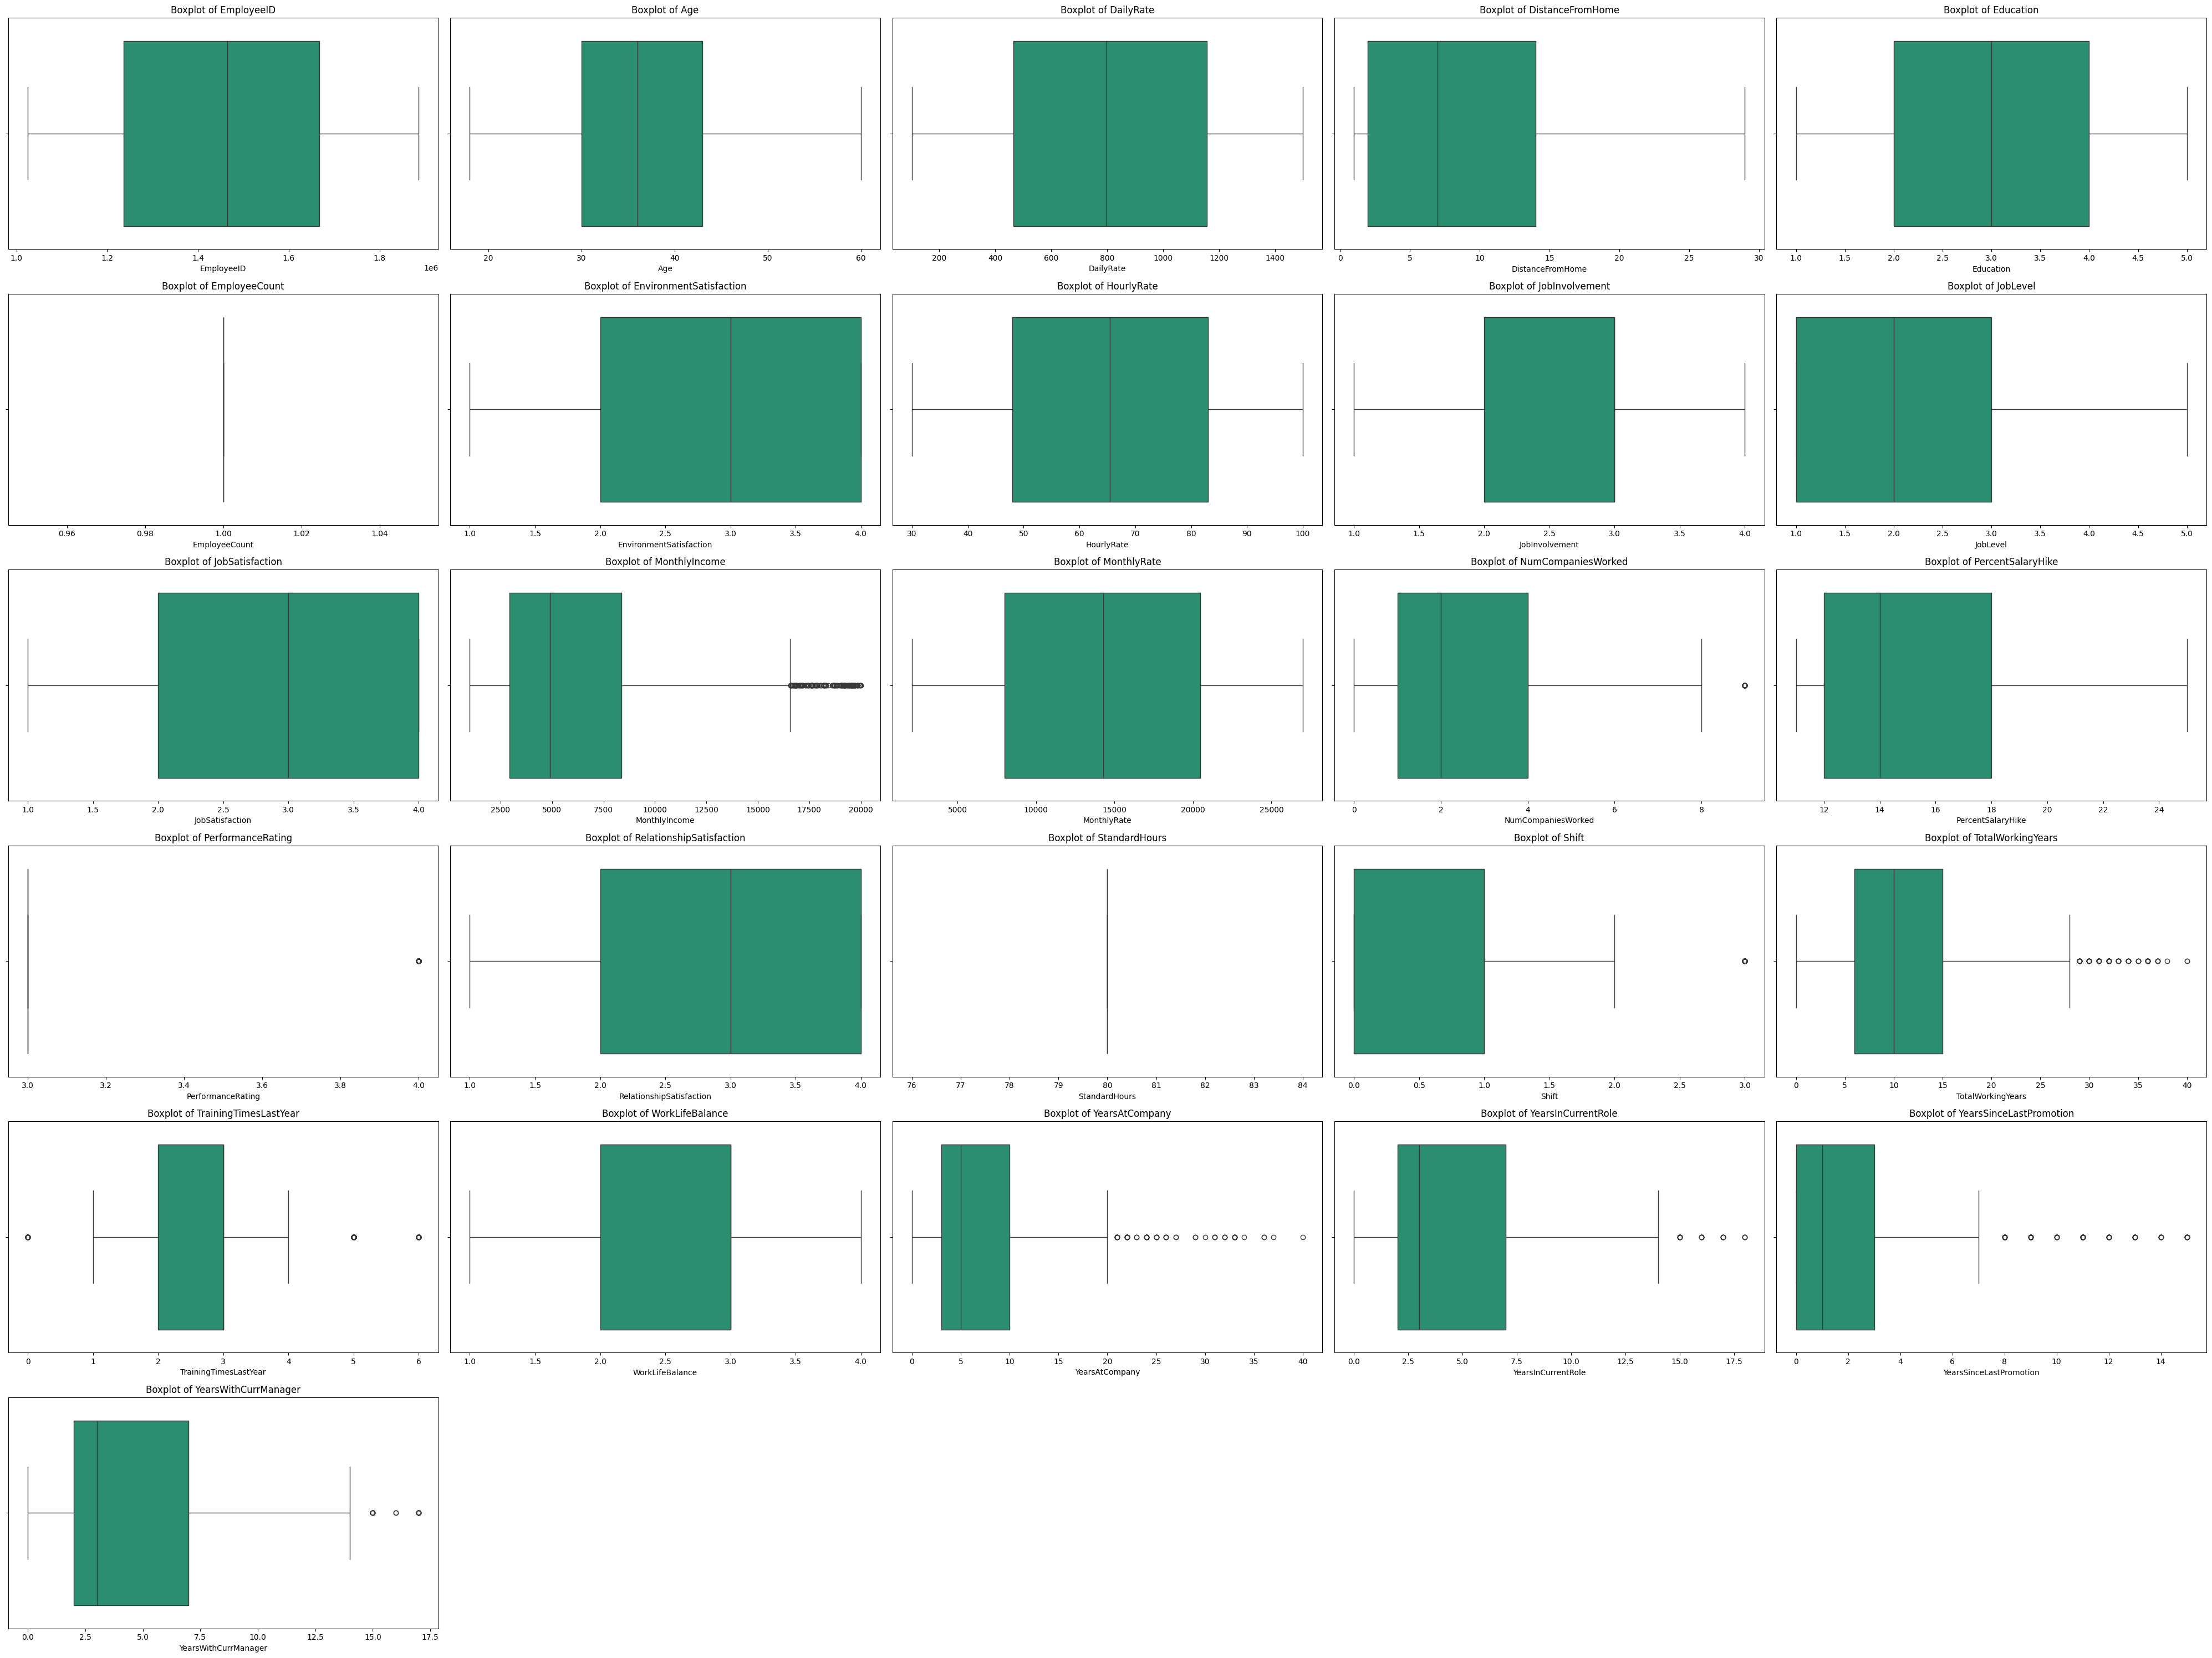

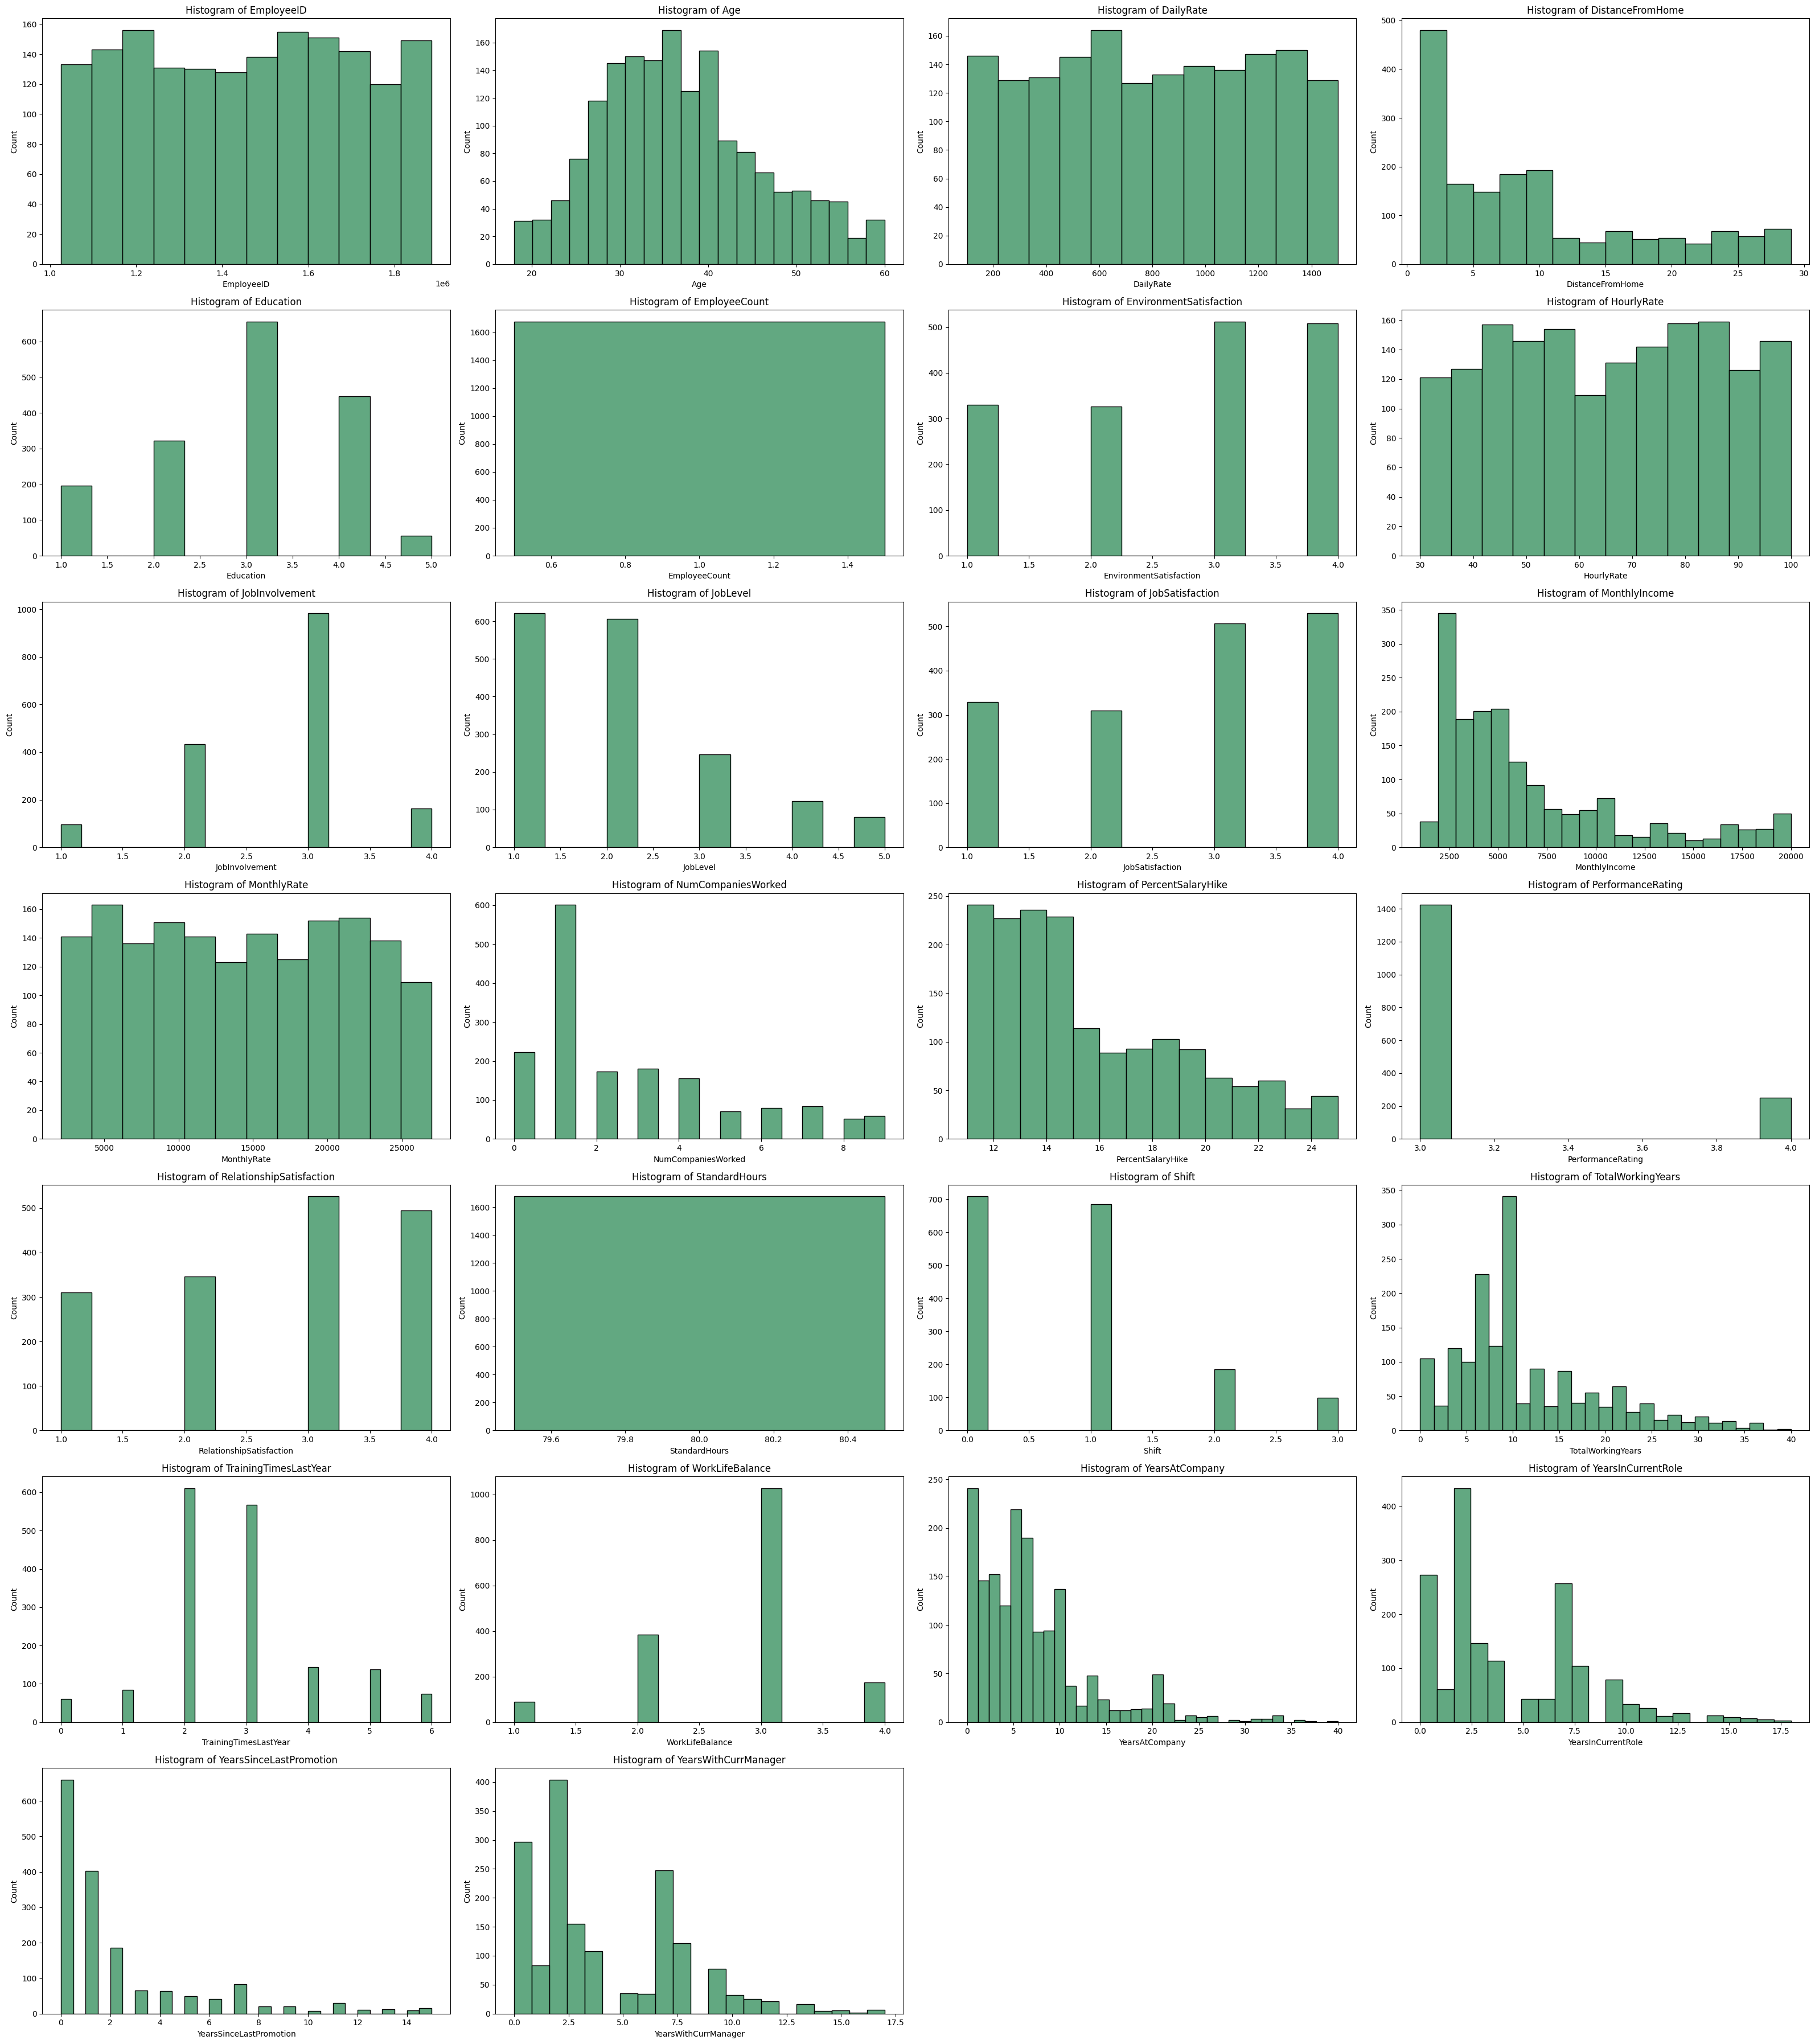

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
listNumericalColumns = df.select_dtypes(include='int64').columns.to_list()
# Select categorical columns
listCategorialColumns = df.select_dtypes(include='object').columns.to_list()

# Boxplot graphs
plt.figure(figsize=(40, 30))
sp = 1
num_cols = len(listNumericalColumns)
num_rows = (num_cols + 4) // 5

for i in listNumericalColumns:
    plt.subplot(num_rows, 5, sp)
    sns.boxplot(data=abt_00, x=i, palette='Dark2')
    plt.title(f'Boxplot of {i}')
    sp += 1

plt.tight_layout()
plt.show()

# Histogram graphs
plt.figure(figsize=(32, 36))
sp = 1
num_cols = len(listNumericalColumns)
num_rows = (num_cols + 3) // 4

for i in listNumericalColumns:
    plt.subplot(num_rows, 4, sp)
    sns.histplot(data=abt_00, x=i, color='seagreen')
    plt.title(f'Histogram of {i}')
    sp += 1

plt.tight_layout()
plt.show()


## Insights

1. **Age**:
   - The age distribution is slightly right-skewed, with most employees in the 30-40 age range. There are fewer employees in the younger and older age groups.

2. **DailyRate**:
   - Daily rates are evenly distributed, with a slight increase in frequency at higher rates.

3. **DistanceFromHome**:
   - Most employees live relatively close to work, with a significant number living within 1-5 units of distance. Fewer employees live farther away.

4. **Education**:
   - The distribution shows higher frequencies for certain education levels (likely "2" and "3"), indicating that most employees have intermediate education levels.

5. **EmployeeCount**:
   - Appears to be a constant with all values equal to "1", indicating that each row in the dataset represents a single employee.

6. **EnvironmentSatisfaction**:
   - Environment satisfaction is variably distributed, with peaks at intermediate satisfaction levels.

7. **HourlyRate**:
   - The distribution of hourly rates is fairly uniform, with no major peaks or drops.

8. **JobInvolvement**:
   - Most employees have intermediate levels of job involvement, with fewer employees at the extremes of high or low involvement.

9. **JobLevel**:
   - The distribution shows most employees at lower job levels, with a gradual decrease in higher levels.

10. **JobSatisfaction**:
    - Job satisfaction is distributed similarly to environment satisfaction, with peaks at intermediate levels.

11. **MonthlyIncome**:
    - Monthly income distribution appears quite varied, with more employees receiving intermediate monthly incomes.

12. **MonthlyRate**:
    - Monthly rate also shows a varied distribution, with no clear pattern of concentration in specific ranges.

13. **NumCompaniesWorked**:
    - Most employees have worked at few companies previously, with a sharp decrease in the number of employees who have worked at many companies.

14. **PercentSalaryHike**:
    - The distribution of salary hikes is uniform, with no significant peaks.

15. **PerformanceRating**:
    - Most employees have intermediate performance ratings, with fewer at the extremes.

16. **RelationshipSatisfaction**:
    - Relationship satisfaction is uniformly distributed, with a slight tilt towards intermediate levels of satisfaction.

17. **StandardHours**:
    - All employees seem to work a standard number of hours, likely 80, indicating a constant value.

18. **TotalWorkingYears**:
    - The distribution of total working years shows that most employees have intermediate experience, with fewer at the extremes of little or extensive experience.

19. **TrainingTimesLastYear**:
    - The distribution shows that most employees had few training sessions last year, with a decrease in the number of employees who had many training sessions.

20. **WorkLifeBalance**:
    - Most employees have intermediate levels of work-life balance, with fewer at the extremes.

21. **YearsAtCompany**:
    - The distribution of years at the company shows that most employees have been with the company for a few years, with a gradual decrease in longer tenure.

22. **YearsInCurrentRole**:
    - Most employees have been in their current roles for a few years, with a gradual decrease in longer role tenure.

23. **YearsSinceLastPromotion**:
    - The distribution shows that most employees were promoted recently, with a decrease in the number of years since the last promotion.

24. **YearsWithCurrManager**:
    - Most employees have been with their current managers for a few years, with a gradual decrease in longer tenures with the same manager.


# 5. Data Exploration and Cleaning
This involves several steps of data cleaning and transformation to ensure the data is in a suitable format for modeling.

## Metadata

In [5]:
def insights_harbor(dataframe):
    """
    Generate a dataframe containing metadata for the columns of the provided dataframe.

    :param dataframe: DataFrame for which metadata will be generated.
    :return: DataFrame containing metadata.
    """

    # Basic metadata collection
    metadata = pd.DataFrame({
        'variable_name': dataframe.columns,
        'type': dataframe.dtypes,
        'null_count': dataframe.isnull().sum(),
        'null_percentage': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinality': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='null_percentage',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [10]:
metadata_df = insights_harbor(df)
metadata_df.head(100)

,variable_name,type,null_count,null_percentage,cardinality
0,Age,int64,0,0.0,43
1,StandardHours,int64,0,0.0,1
2,NumCompaniesWorked,int64,0,0.0,10
3,Over18,object,0,0.0,1
4,OverTime,object,0,0.0,2
5,PercentSalaryHike,int64,0,0.0,15
6,PerformanceRating,int64,0,0.0,2
7,RelationshipSatisfaction,int64,0,0.0,4
8,Shift,int64,0,0.0,4
9,Attrition,int64,0,0.0,2


# 6. Data Division

## Performing Holdout (80/20)
*   treino_00 will store 80% of the information and will be used to create the model;
*   test_00 will store 20% of the information and will be used to test my model.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the data into 80% for training and 20% for testing
train_00, test_00 = train_test_split(df, test_size=0.2, random_state=42)

# Displaying the number of rows in the resulting DataFrames
print(f'Number of rows in the working data (training): {train_00.shape[0]}')
print(f'Quantidade de linhas em dados de test (teste): {test_00.shape[0]}')

# Saving the DataFrames to CSV files
train_00.to_csv('/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/train_00.csv', index=False)
test_00.to_csv('/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/test.csv', index=False)

Number of rows in the working data (training): 1340
Quantidade de linhas em dados de test (teste): 336


In [87]:
train_00.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
832,17,0,Travel_Rarely,237,Neurology,7,4,Technical Degree,1,3,...,2,80,0,6,2,1,5,4,1,4
266,13,0,Travel_Rarely,777,Maternity,22,3,Medical,1,2,...,2,80,1,10,2,3,9,0,7,8
148,23,0,Travel_Rarely,471,Maternity,8,4,Life Sciences,1,3,...,4,80,1,7,2,3,5,0,1,4
383,4,0,Travel_Rarely,86,Maternity,10,3,Medical,1,1,...,4,80,1,2,1,3,2,1,1,2
907,5,0,Travel_Rarely,150,Maternity,0,2,Life Sciences,1,4,...,4,80,1,1,2,3,1,0,0,1


In [88]:
train_00.shape

(1340, 34)

In [89]:
test_00.shape

(336, 34)

# 7. Data Preprocessing

# Handling Categorical Variables


In [26]:
# Calculate the cardinality of each column
cardinality = train_00.nunique()

# Create lists to store columns with high and low cardinality
high_cardinality_cols = []
low_cardinality_cols = []

# Iterate over the columns and classify them
for col in cardinality.index:
  if cardinality[col] > 20:
    high_cardinality_cols.append(col)
  else:
    low_cardinality_cols.append(col)

# Print the lists of columns
print("Columns with high cardinality (greater than 20): ")
for col in high_cardinality_cols:
  print(col)

print("\nColumns with low cardinality (less than or equal to 20):")
for col in low_cardinality_cols:
  print(col)


Columns with high cardinality (greater than 20): 
Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
TotalWorkingYears
YearsAtCompany

Columns with low cardinality (less than or equal to 20):
Attrition
BusinessTravel
Department
Education
EducationField
EmployeeCount
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
Shift
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


## Applying Label Encoding to columns with high cardinality (>20)

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Selecting columns with high cardinality
print('List of variables for Label Encoding:', high_cardinality_cols)

# Applying the LabelEncoder
for col in high_cardinality_cols:
    train_00[col] = label_encoder.fit_transform(train_00[col])

# Verifying the result
train_00.head()
print(train_00.dtypes)
print(f"Shape of the DataFrame after Label Encoding: {train_00.shape}")


List of variables for Label Encoding: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            in

## Handling categorical variables with low cardinality

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.intersection(low_cardinality_cols)
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Check unique values and clean only string columns in low_cardinality_cols
for col in categorical_cols:
    print(f"Unique values in '{col}' before cleaning:")
    print(train_00[col].unique())

    # Remove leading and trailing whitespace
    train_00[col] = train_00[col].str.strip()

    print(f"Unique values in '{col}' after cleaning:")
    print(train_00[col].unique())
    print(f"Missing values in '{col}': {train_00[col].isnull().sum()}")

# Instantiate the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the data for low cardinality categorical columns
encoded = encoder.fit_transform(train_00[categorical_cols])

# Create a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([train_00.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Remove the original categorical columns
df_encoded.drop(columns=categorical_cols, inplace=True)

# Verify the final DataFrame
print("Final DataFrame after One-Hot Encoding:")



Unique values in 'BusinessTravel' before cleaning:
['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Unique values in 'BusinessTravel' after cleaning:
['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Missing values in 'BusinessTravel': 0
Unique values in 'Department' before cleaning:
['Neurology' 'Maternity' 'Cardiology']
Unique values in 'Department' after cleaning:
['Neurology' 'Maternity' 'Cardiology']
Missing values in 'Department': 0
Unique values in 'EducationField' before cleaning:
['Technical Degree' 'Medical' 'Life Sciences' 'Marketing' 'Other'
 'Human Resources']
Unique values in 'EducationField' after cleaning:
['Technical Degree' 'Medical' 'Life Sciences' 'Marketing' 'Other'
 'Human Resources']
Missing values in 'EducationField': 0
Unique values in 'Gender' before cleaning:
['Male' 'Female']
Unique values in 'Gender' after cleaning:
['Male' 'Female']
Missing values in 'Gender': 0
Unique values in 'JobRole' before cleaning:
['Other' 'Nurse' 'Therapist' 'Administrative' 'A

In [29]:
train_01 = df_encoded
train_01.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,17,0,237,7,4,1,3,70,3,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,13,0,777,22,3,1,2,34,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,23,0,471,8,4,1,3,64,3,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,0,86,10,3,1,1,13,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,0,150,0,2,1,4,17,3,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Performing the same treatment on the test base

# Handling Categorical Variables


In [57]:
# Calculate the cardinality of each column
cardinality = test_00.nunique()

# Create lists to store columns with high and low cardinality
high_cardinality_cols = []
low_cardinality_cols = []

# Iterate over the columns and classify them
for col in cardinality.index:
  if cardinality[col] > 20:
    high_cardinality_cols.append(col)
  else:
    low_cardinality_cols.append(col)

# Print the lists of columns
print("Columns with high cardinality (greater than 20): ")
for col in high_cardinality_cols:
  print(col)

print("\nColumns with low cardinality (less than or equal to 20):")
for col in low_cardinality_cols:
  print(col)


Columns with high cardinality (greater than 20): 
Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
TotalWorkingYears
YearsAtCompany

Columns with low cardinality (less than or equal to 20):
Attrition
BusinessTravel
Department
Education
EducationField
EmployeeCount
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
Shift
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


## Applying Label Encoding to columns with high cardinality (>20)

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Selecting columns with high cardinality
print('List of variables for Label Encoding:', high_cardinality_cols)

# Applying the LabelEncoder
for col in high_cardinality_cols:
    test_00[col] = label_encoder.fit_transform(test_00[col])

# Verifying the result
test_00.head()
print(test_00.dtypes)
print(f"Shape of the DataFrame after Label Encoding: {test_00.shape}")


List of variables for Label Encoding: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            in

## Handling categorical variables with low cardinality

In [59]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.intersection(low_cardinality_cols)
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Check unique values and clean only string columns in low_cardinality_cols
for col in categorical_cols:
    print(f"Unique values in '{col}' before cleaning:")
    print(test_00[col].unique())

    # Remove leading and trailing whitespace
    test_00[col] = test_00[col].str.strip()

    print(f"Unique values in '{col}' after cleaning:")
    print(test_00[col].unique())
    print(f"Missing values in '{col}': {test_00[col].isnull().sum()}")

# Instantiate the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the data for low cardinality categorical columns
encoded = encoder.fit_transform(test_00[categorical_cols])

# Create a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded_test = pd.concat([test_00.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Remove the original categorical columns
df_encoded_test.drop(columns=categorical_cols, inplace=True)

# Verify the final DataFrame
print("Final DataFrame after One-Hot Encoding:")



Unique values in 'BusinessTravel' before cleaning:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Unique values in 'BusinessTravel' after cleaning:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Missing values in 'BusinessTravel': 0
Unique values in 'Department' before cleaning:
['Neurology' 'Cardiology' 'Maternity']
Unique values in 'Department' after cleaning:
['Neurology' 'Cardiology' 'Maternity']
Missing values in 'Department': 0
Unique values in 'EducationField' before cleaning:
['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
Unique values in 'EducationField' after cleaning:
['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
Missing values in 'EducationField': 0
Unique values in 'Gender' before cleaning:
['Female' 'Male']
Unique values in 'Gender' after cleaning:
['Female' 'Male']
Missing values in 'Gender': 0
Unique values in 'JobRole' before cleaning:
['Other' 'Nurse' 'Administrative' 'Therapist' 'A

In [60]:
test_01 = df_encoded_test
test_01.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,31,0,274,1,3,1,4,0,3,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,51,6,1,1,2,1,3,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,19,0,282,1,2,1,4,11,3,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,16,0,18,22,4,1,2,60,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,9,0,275,0,3,1,1,41,2,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
test_01.shape

(336, 43)

In [66]:
train_01.shape

(1340, 43)

# 8. Feature Engineering

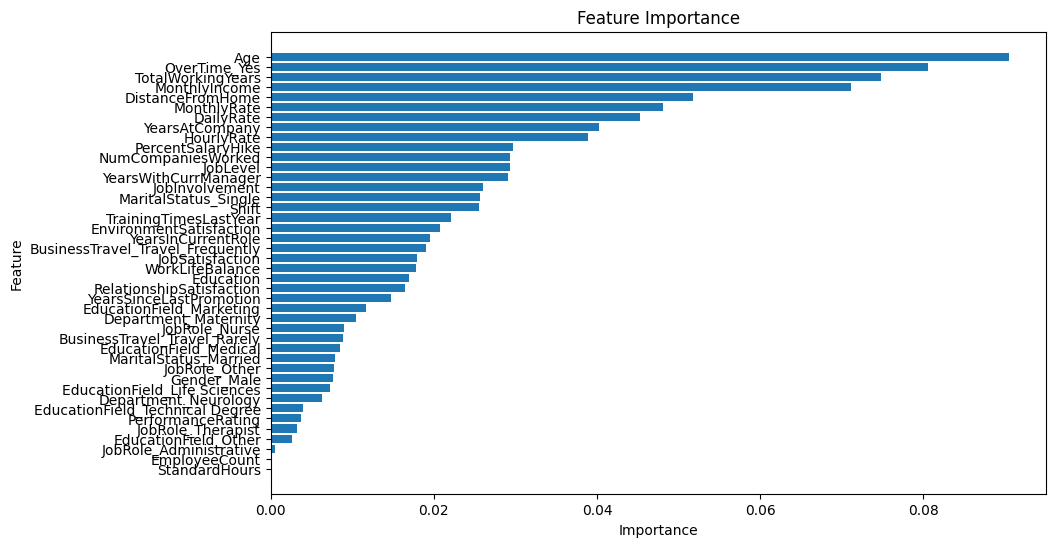

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = train_01.drop(columns=['Attrition'])
y = train_01['Attrition']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the importance of features
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe with the importance
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Generate the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [31]:
# Select the top 20 features
top_20_features = feature_importance_df.head(20)['feature']

# Create a new dataframe with only the top 20 features
train_02 = train_01[top_20_features.to_list() + ['Attrition']]

train_02.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,JobLevel,YearsWithCurrManager,JobInvolvement,MaritalStatus_Single,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition
0,17,0.0,6,450,7,238,237,5,70,17,...,1,4,3,1.0,0,2,3,4,0.0,0
1,13,0.0,10,645,22,588,777,9,34,21,...,2,8,2,0.0,1,2,2,0,0.0,0
2,23,0.0,7,89,8,229,471,5,64,21,...,1,4,3,0.0,1,2,3,0,0.0,0
3,4,0.0,2,90,10,1078,86,2,13,13,...,1,2,3,0.0,1,1,1,1,0.0,0
4,5,0.0,1,9,0,702,150,1,17,22,...,1,1,3,0.0,1,2,4,0,0.0,0


### Test dataset

In [67]:
# Select the top 20 features
top_20_featurestest = feature_importance_df.head(20)['feature']

# Create a new dataframe with only the top 20 features
test_02 = test_01[top_20_featurestest.to_list() + ['Attrition']]

test_02.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,JobLevel,YearsWithCurrManager,JobInvolvement,MaritalStatus_Single,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition
0,31,0.0,30,305,1,111,274,2,0,22,...,4,2,3,0.0,1,3,4,2,1.0,0
1,2,0.0,1,63,6,40,51,1,1,13,...,1,0,3,1.0,0,3,2,0,0.0,1
2,19,1.0,1,5,1,143,282,1,11,23,...,1,0,3,0.0,1,3,4,0,1.0,0
3,16,0.0,6,66,22,114,18,5,60,16,...,1,3,1,0.0,1,2,2,4,0.0,0
4,9,0.0,1,4,0,151,275,1,41,14,...,1,0,2,0.0,1,2,1,0,0.0,0


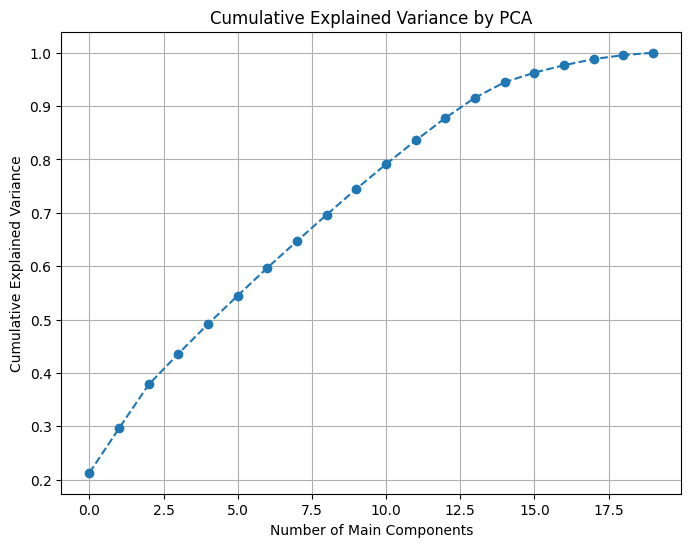

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = train_02.drop(columns=['Attrition'])

# Normalize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Main Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()


* I noticed in the graph that all selected characteristics matter for PCA

In [33]:
train_02.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,JobLevel,YearsWithCurrManager,JobInvolvement,MaritalStatus_Single,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition
0,17,0.0,6,450,7,238,237,5,70,17,...,1,4,3,1.0,0,2,3,4,0.0,0
1,13,0.0,10,645,22,588,777,9,34,21,...,2,8,2,0.0,1,2,2,0,0.0,0
2,23,0.0,7,89,8,229,471,5,64,21,...,1,4,3,0.0,1,2,3,0,0.0,0
3,4,0.0,2,90,10,1078,86,2,13,13,...,1,2,3,0.0,1,1,1,1,0.0,0
4,5,0.0,1,9,0,702,150,1,17,22,...,1,1,3,0.0,1,2,4,0,0.0,0


## Data Cleanning

### Performing data cleaning and processing

* Based on the distributions observed in the bar charts, I will perform some treatments.

### Remove constant variables, as they do not contribute to variability and will not aid in model construction.

In [34]:
import numpy as np
from scipy.stats import boxcox

def apply_transformations(df):
    df_transformed = df.copy()

    # Logarithmic Transformation
    df_transformed['MonthlyIncome_log'] = np.log(df['MonthlyIncome'].replace(0, np.nan))
    df_transformed['TotalWorkingYears_log'] = np.log(df['TotalWorkingYears'].replace(0, np.nan))

    # Square Root Transformation
    df_transformed['DistanceFromHome_sqrt'] = np.sqrt(df['DistanceFromHome'])

    # Box-Cox transformation (example for a column)
    df_transformed['YearsAtCompany_boxcox'], _ = boxcox(df['YearsAtCompany'] + 1)

    return df_transformed


train_03 = apply_transformations(train_02)
train_03.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox
0,17,0.0,6,450,7,238,237,5,70,17,...,0,2,3,4,0.0,0,6.109248,1.791759,2.645751,2.011939
1,13,0.0,10,645,22,588,777,9,34,21,...,1,2,2,0,0.0,0,6.469250,2.302585,4.690416,2.674506
2,23,0.0,7,89,8,229,471,5,64,21,...,1,2,3,0,0.0,0,4.488636,1.945910,2.828427,2.011939
3,4,0.0,2,90,10,1078,86,2,13,13,...,1,1,1,1,0.0,0,4.499810,0.693147,3.162278,1.178923
4,5,0.0,1,9,0,702,150,1,17,22,...,1,2,4,0,0.0,0,2.197225,0.000000,0.000000,0.724562


In [69]:
test_03 = apply_transformations(test_02)
test_03.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox
0,31,0.0,30,305,1,111,274,2,0,22,...,1,3,4,2,1.0,0,5.720312,3.401197,1.000000,1.121386
1,2,0.0,1,63,6,40,51,1,1,13,...,0,3,2,0,0.0,1,4.143135,0.000000,2.449490,0.702167
2,19,1.0,1,5,1,143,282,1,11,23,...,1,3,4,0,1.0,0,1.609438,0.000000,1.000000,0.702167
3,16,0.0,6,66,22,114,18,5,60,16,...,1,2,2,4,0.0,0,4.189655,1.791759,4.690416,1.852865
4,9,0.0,1,4,0,151,275,1,41,14,...,1,2,1,0,0.0,0,1.386294,0.000000,0.000000,0.702167


In [35]:
# Identifying constant variables
constant_columns = [col for col in train_03.columns if train_03[col].nunique() == 1]

# Listing the constant variables
print("Constant variables found:", constant_columns)

# Removing the constant variables and creating train_04.
train_04 = train_03.drop(columns=constant_columns)

# Checking the remaining columns in train_04.
print("Remaining columns in train_04:", train_04.columns)
train_04.shape

Constant variables found: []
Remaining columns in train_04: Index(['Age', 'OverTime_Yes', 'TotalWorkingYears', 'MonthlyIncome',
       'DistanceFromHome', 'MonthlyRate', 'DailyRate', 'YearsAtCompany',
       'HourlyRate', 'PercentSalaryHike', 'NumCompaniesWorked', 'JobLevel',
       'YearsWithCurrManager', 'JobInvolvement', 'MaritalStatus_Single',
       'Shift', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'YearsInCurrentRole', 'BusinessTravel_Travel_Frequently', 'Attrition',
       'MonthlyIncome_log', 'TotalWorkingYears_log', 'DistanceFromHome_sqrt',
       'YearsAtCompany_boxcox'],
      dtype='object')


(1340, 25)

In [71]:
# Identifying constant variables
constant_columnstest = [col for col in test_03.columns if test_03[col].nunique() == 1]

# Listing the constant variables
print("Constant variables found:", constant_columnstest)

# Removing the constant variables and creating test_04.
test_04 = test_03.drop(columns=constant_columns)

# Checking the remaining columns in test_04.
print("Remaining columns in test_04:", test_04.columns)
test_04.shape

Constant variables found: []
Remaining columns in test_04: Index(['Age', 'OverTime_Yes', 'TotalWorkingYears', 'MonthlyIncome',
       'DistanceFromHome', 'MonthlyRate', 'DailyRate', 'YearsAtCompany',
       'HourlyRate', 'PercentSalaryHike', 'NumCompaniesWorked', 'JobLevel',
       'YearsWithCurrManager', 'JobInvolvement', 'MaritalStatus_Single',
       'Shift', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'YearsInCurrentRole', 'BusinessTravel_Travel_Frequently', 'Attrition',
       'MonthlyIncome_log', 'TotalWorkingYears_log', 'DistanceFromHome_sqrt',
       'YearsAtCompany_boxcox'],
      dtype='object')


(336, 25)

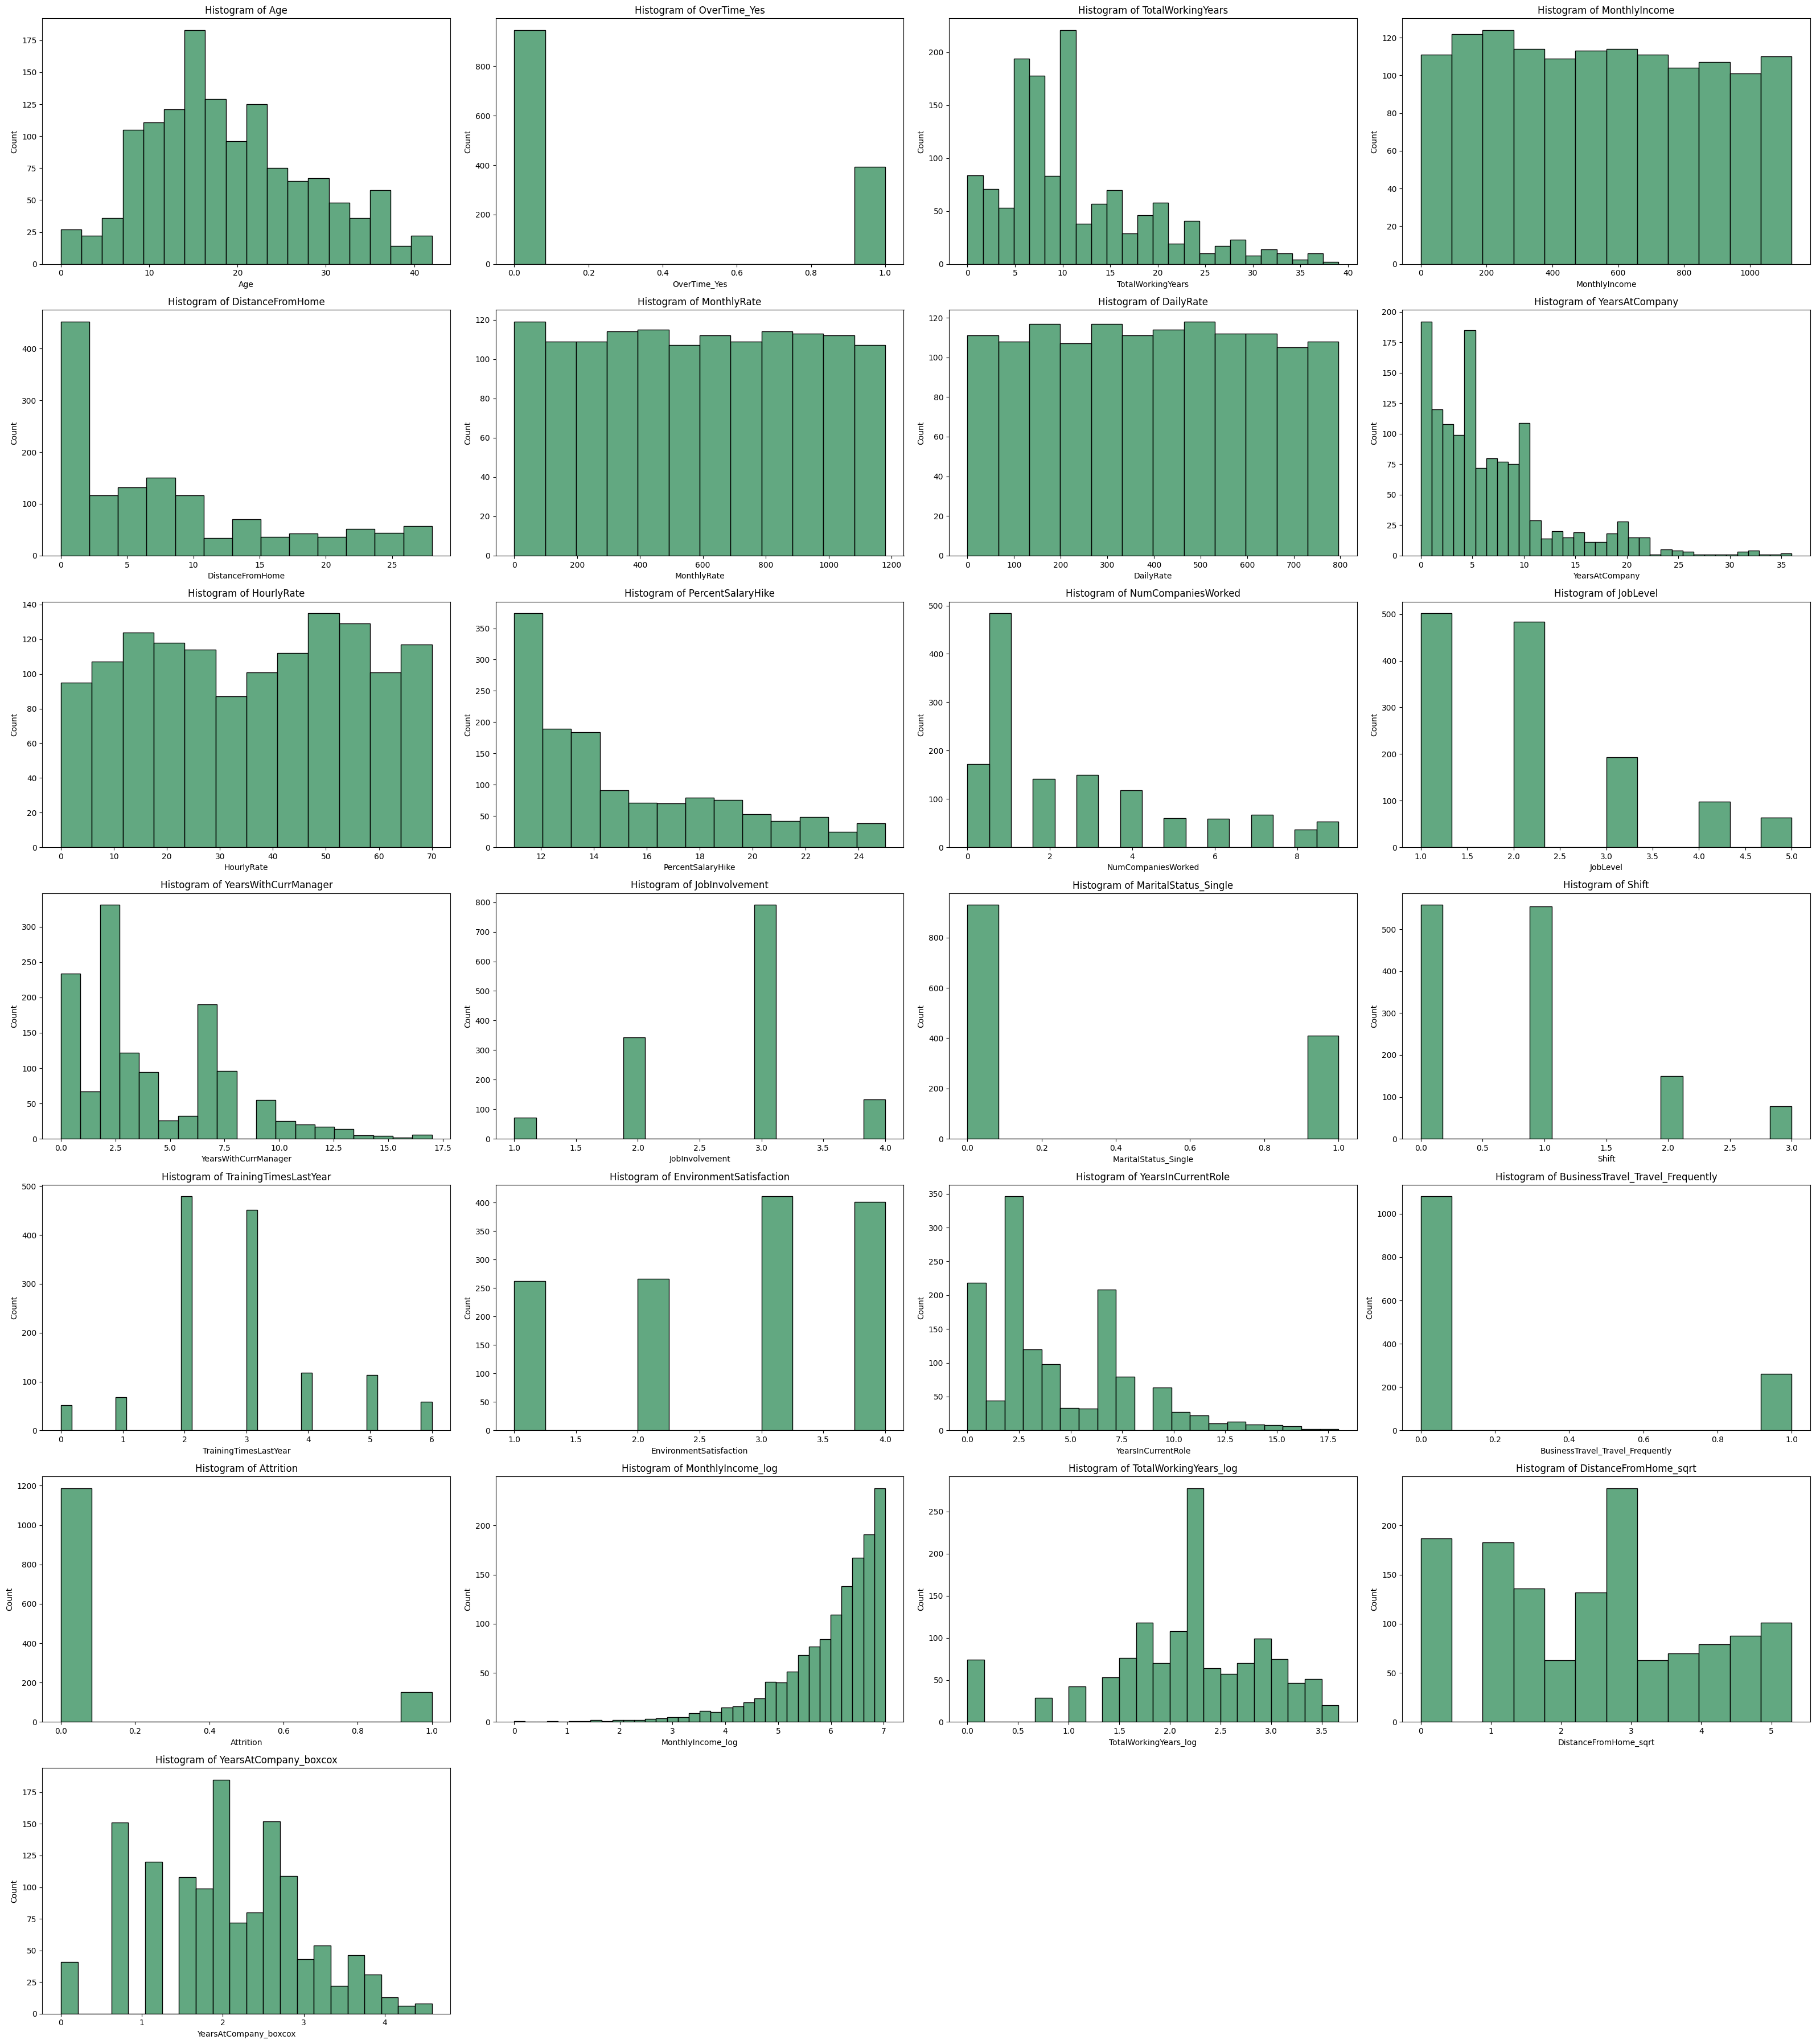

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram graphs
plt.figure(figsize=(32, 36))
sp = 1
num_cols = len(train_04.columns)
num_rows = (num_cols + 3) // 4

for i in train_04.columns:
    plt.subplot(num_rows, 4, sp)
    sns.histplot(data=train_04, x=i, color='seagreen')
    plt.title(f'Histogram of {i}')
    sp += 1

plt.tight_layout()
plt.show()


In [38]:
train_04.shape

(1340, 25)

## Exploratory Analysis of train_04

### The logarithmic transformation of TrainingTimesLastYear shows that the majority of the data is concentrated at low values, and the transformation did not significantly alter this characteristic.

### Identifying highly correlated variables (to avoid multicollinearity)

In [39]:
import numpy as np
import pandas as pd

# Select only numerical columns for the correlation matrix
numerical_cols = train_04.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = train_04[numerical_cols].corr().abs()

# Defining a threshold for high correlation
threshold = 0.8

# Find pairs of variables with correlation greater than the threshold
high_corr_var = np.where(correlation_matrix > threshold)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]

# Display pairs of highly correlated variables
print("Pairs of highly correlated variables:")
for var_pair in high_corr_var:
    print(var_pair)



Pairs of highly correlated variables:
('TotalWorkingYears', 'TotalWorkingYears_log')
('MonthlyIncome', 'JobLevel')
('MonthlyIncome', 'MonthlyIncome_log')
('DistanceFromHome', 'DistanceFromHome_sqrt')
('YearsAtCompany', 'YearsAtCompany_boxcox')
('YearsWithCurrManager', 'YearsAtCompany_boxcox')
('YearsInCurrentRole', 'YearsAtCompany_boxcox')


## Conclusions and Actions:
* Data Normalization: The logarithmic and Box-Cox transformations were effective in normalizing variables such as TotalWorkingYears, MonthlyIncome, and YearsAtCompany, facilitating subsequent analyses that assume normality.

* HR Policy Validation: The correlation between MonthlyIncome and JobLevel validates the compensation policy based on employment levels, which can be used to review salary structures and career plans.

* Managerial Stability: The relationship between YearsWithCurrManager and YearsAtCompany suggests that managerial stability policies may be beneficial for employee retention.

* Career Progression Analysis: The correlation between YearsInCurrentRole and YearsAtCompany can be explored to better understand employees' career progression and identify potential areas for improvement in career development programs.

## Performing comparison between train and test

In [72]:
# Checking the columns of test_04 and train_04
columns_test = set(test_04.columns)
columns_train = set(train_04.columns)

# Find the columns that are in test_04 but not in train_04
missing_columns_train_04 = columns_test - columns_train
missing_columns_test_04 = columns_train - columns_test

# The columns missing in train_04
print("Columns present in test_04 but not in train_04:")
for column in missing_columns_train_04:
  print(column)



Columns present in test_04 but not in train_04:


In [73]:
# The columns missing in test_01
print("Columns present in train_04 but not in test_04:")
for column in missing_columns_test_04:
  print(column)

Columns present in train_04 but not in test_04:


In [91]:
missing_train_04 = train_04.isnull().sum()
print(missing_train_04)

Age                                  0
OverTime_Yes                         0
TotalWorkingYears                    0
MonthlyIncome                        0
DistanceFromHome                     0
MonthlyRate                          0
DailyRate                            0
YearsAtCompany                       0
HourlyRate                           0
PercentSalaryHike                    0
NumCompaniesWorked                   0
JobLevel                             0
YearsWithCurrManager                 0
JobInvolvement                       0
MaritalStatus_Single                 0
Shift                                0
TrainingTimesLastYear                0
EnvironmentSatisfaction              0
YearsInCurrentRole                   0
BusinessTravel_Travel_Frequently     0
Attrition                            0
MonthlyIncome_log                    1
TotalWorkingYears_log               10
DistanceFromHome_sqrt                0
YearsAtCompany_boxcox                0
dtype: int64


In [92]:
# Fill missing values with the median
train_05 = train_04.fillna(train_04.median())

# Verify if there are still missing values
missing_train_05 = train_05.isnull().sum()
print(missing_train_05)


Age                                 0
OverTime_Yes                        0
TotalWorkingYears                   0
MonthlyIncome                       0
DistanceFromHome                    0
MonthlyRate                         0
DailyRate                           0
YearsAtCompany                      0
HourlyRate                          0
PercentSalaryHike                   0
NumCompaniesWorked                  0
JobLevel                            0
YearsWithCurrManager                0
JobInvolvement                      0
MaritalStatus_Single                0
Shift                               0
TrainingTimesLastYear               0
EnvironmentSatisfaction             0
YearsInCurrentRole                  0
BusinessTravel_Travel_Frequently    0
Attrition                           0
MonthlyIncome_log                   0
TotalWorkingYears_log               0
DistanceFromHome_sqrt               0
YearsAtCompany_boxcox               0
dtype: int64


In [74]:
missing_test_04 = test_04.isnull().sum()
print(missing_test_04)


Age                                 0
OverTime_Yes                        0
TotalWorkingYears                   0
MonthlyIncome                       0
DistanceFromHome                    0
MonthlyRate                         0
DailyRate                           0
YearsAtCompany                      0
HourlyRate                          0
PercentSalaryHike                   0
NumCompaniesWorked                  0
JobLevel                            0
YearsWithCurrManager                0
JobInvolvement                      0
MaritalStatus_Single                0
Shift                               0
TrainingTimesLastYear               0
EnvironmentSatisfaction             0
YearsInCurrentRole                  0
BusinessTravel_Travel_Frequently    0
Attrition                           0
MonthlyIncome_log                   1
TotalWorkingYears_log               1
DistanceFromHome_sqrt               0
YearsAtCompany_boxcox               0
dtype: int64


In [75]:
# Fill missing values with the median
test_05 = test_04.fillna(test_04.median())

# Verify if there are still missing values
missing_test_05 = test_05.isnull().sum()
print(missing_test_05)


Age                                 0
OverTime_Yes                        0
TotalWorkingYears                   0
MonthlyIncome                       0
DistanceFromHome                    0
MonthlyRate                         0
DailyRate                           0
YearsAtCompany                      0
HourlyRate                          0
PercentSalaryHike                   0
NumCompaniesWorked                  0
JobLevel                            0
YearsWithCurrManager                0
JobInvolvement                      0
MaritalStatus_Single                0
Shift                               0
TrainingTimesLastYear               0
EnvironmentSatisfaction             0
YearsInCurrentRole                  0
BusinessTravel_Travel_Frequently    0
Attrition                           0
MonthlyIncome_log                   0
TotalWorkingYears_log               0
DistanceFromHome_sqrt               0
YearsAtCompany_boxcox               0
dtype: int64


# 9. Feature Selection









In [78]:
train_05.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox
0,17,0.0,6,450,7,238,237,5,70,17,...,0,2,3,4,0.0,0,6.109248,1.791759,2.645751,2.011939
1,13,0.0,10,645,22,588,777,9,34,21,...,1,2,2,0,0.0,0,6.469250,2.302585,4.690416,2.674506
2,23,0.0,7,89,8,229,471,5,64,21,...,1,2,3,0,0.0,0,4.488636,1.945910,2.828427,2.011939
3,4,0.0,2,90,10,1078,86,2,13,13,...,1,1,1,1,0.0,0,4.499810,0.693147,3.162278,1.178923
4,5,0.0,1,9,0,702,150,1,17,22,...,1,2,4,0,0.0,0,2.197225,0.000000,0.000000,0.724562


## Checking the class balance

In [94]:
# Check the class balance
target_counts = train_05['Attrition'].value_counts()
print(target_counts)

# Calculate the percentage of each class
target_percentage = target_counts / target_counts.sum() * 100
print(target_percentage)


Attrition
0    1188
1     152
Name: count, dtype: int64
Attrition
0    88.656716
1    11.343284
Name: count, dtype: float64


In [96]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = train_05.drop('Attrition', axis=1)
y = train_05['Attrition']

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new balanced DataFrame
train_06 = pd.DataFrame(X_resampled, columns=X.columns)
train_06['Attrition'] = y_resampled

# Checking the balance after SMOTE
target_counts_resampled = train_06['Attrition'].value_counts()
print(target_counts_resampled)

# Calculate the percentage of each class after SMOTE
target_percentage_resampled = target_counts_resampled / target_counts_resampled.sum() * 100
print(target_percentage_resampled)


Attrition
0    1188
1    1188
Name: count, dtype: int64
Attrition
0    50.0
1    50.0
Name: count, dtype: float64


# 10. Training the model

### Assessing class imbalances

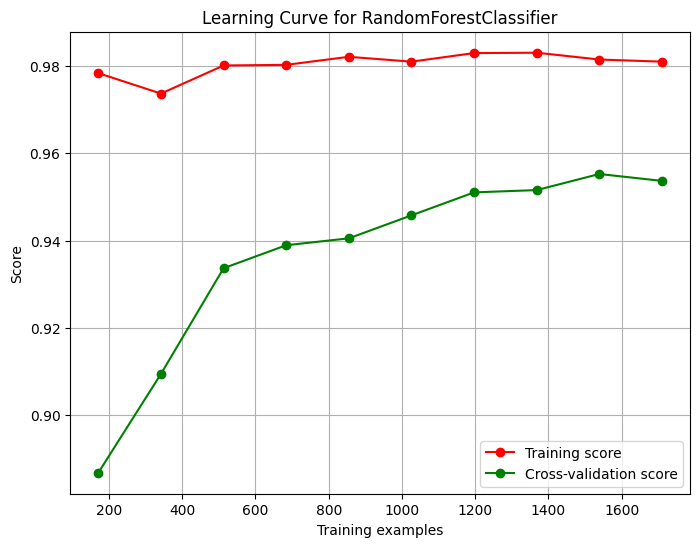

<Figure size 640x480 with 0 Axes>

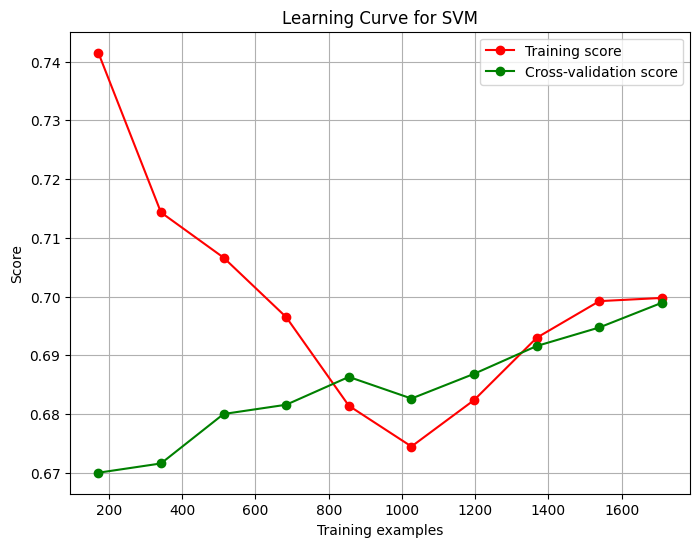

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 865, number of negative: 845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2772
[LightGBM] [Info] Number of data points in the train set: 1710, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505848 -> initscore=0.023393
[LightGBM] [Info] Start training from score 0.023393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

<Figure size 640x480 with 0 Axes>

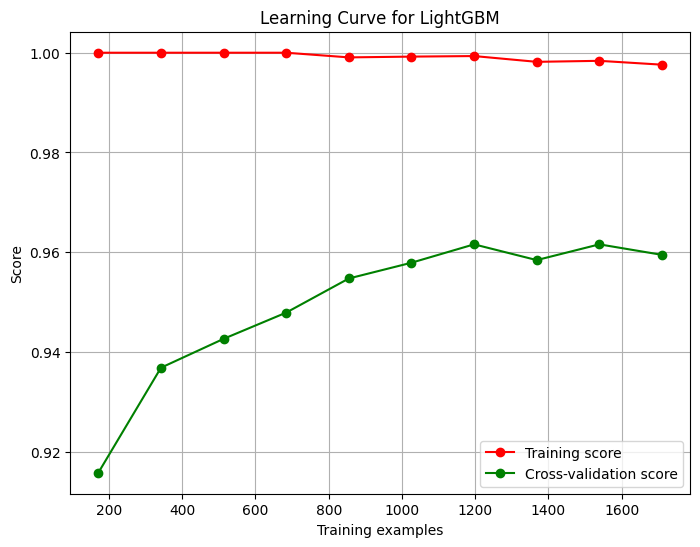

<Figure size 640x480 with 0 Axes>

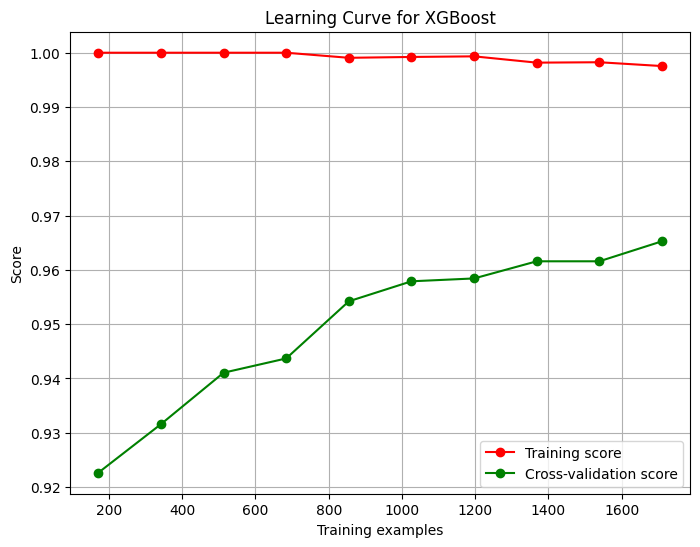

RandomForestClassifier:
Accuracy: 0.9558823529411765
Confusion Matrix:
[[229  11]
 [ 10 226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       240
           1       0.95      0.96      0.96       236

    accuracy                           0.96       476
   macro avg       0.96      0.96      0.96       476
weighted avg       0.96      0.96      0.96       476

Cross-Validation Mean Accuracy: 0.9536842105263158


SVM:
Accuracy: 0.6953781512605042
Confusion Matrix:
[[177  63]
 [ 82 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       240
           1       0.71      0.65      0.68       236

    accuracy                           0.70       476
   macro avg       0.70      0.70      0.69       476
weighted avg       0.70      0.70      0.69       476

Cross-Validation Mean Accuracy: 0.6989473684210525


LightGBM:
Accuracy: 0.960

<Figure size 640x480 with 0 Axes>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold,  cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


X = train_06.drop('Attrition', axis=1)
y = train_06['Attrition']

# Splitting data into train and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to be compared
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, min_samples_split=10, max_features='sqrt', random_state=42),
    'SVM': SVC(random_state=42),
    'LightGBM': lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
),
    'XGBoost': xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
),
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Cross-validation to assess mean accuracy
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross-Validation Mean Accuracy': mean_cv_score
    }


# Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=kf,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    plt.tight_layout()


# Display the final results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross-Validation Mean Accuracy: {metrics['Cross-Validation Mean Accuracy']}")
    print("\n")



### Learning Curves

#### 1. LightGBM:
- **Training Score:** Almost perfect, staying around 1.0, indicating that the model is fitting the training data very well.
- **Cross-Validation Score:** Approximately 0.96, showing that the model is generalizing well to unseen data.
- **Conclusion:** LightGBM is balanced with high accuracy on both training and cross-validation data, suggesting a robust and well-fitted model.

#### 2. XGBoost:
- **Training Score:** Almost perfect, close to 1.0, similar to LightGBM.
- **Cross-Validation Score:** Approximately 0.96, very close to the performance of LightGBM.
- **Conclusion:** XGBoost also shows excellent fitting, with consistent performance and adequate generalization.

#### 3. RandomForestClassifier:
- **Training Score:** High, but slightly lower than LightGBM and XGBoost, around 0.98.
- **Cross-Validation Score:** Approximately 0.96, a bit lower than LightGBM and XGBoost, but still very good.
- **Conclusion:** RandomForestClassifier shows good overall performance, but slightly inferior to the boosting models.

#### 4. SVM:
- **Training Score:** Starts high but decreases, ending around 0.70.
- **Cross-Validation Score:** Initially low, improving with more training data, but remaining around 0.69.
- **Conclusion:** SVM is underfitting, struggling to capture complex patterns in the data. The model is not generalizing well and has significantly lower performance compared to the other models.

## Evaluation the Model

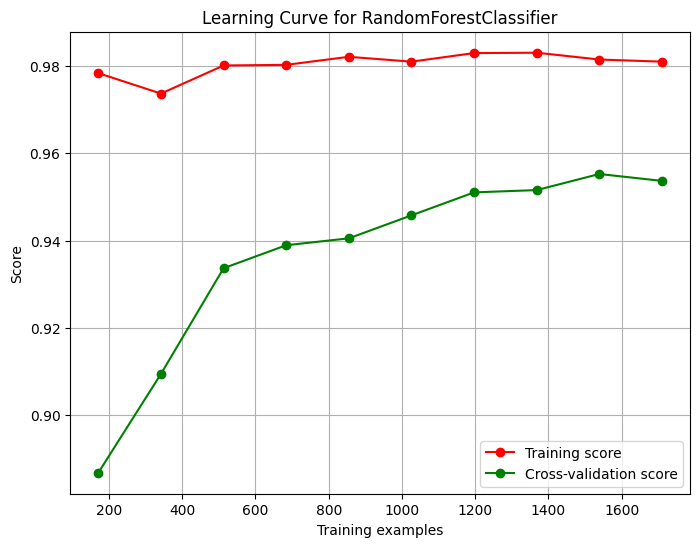

<Figure size 640x480 with 0 Axes>

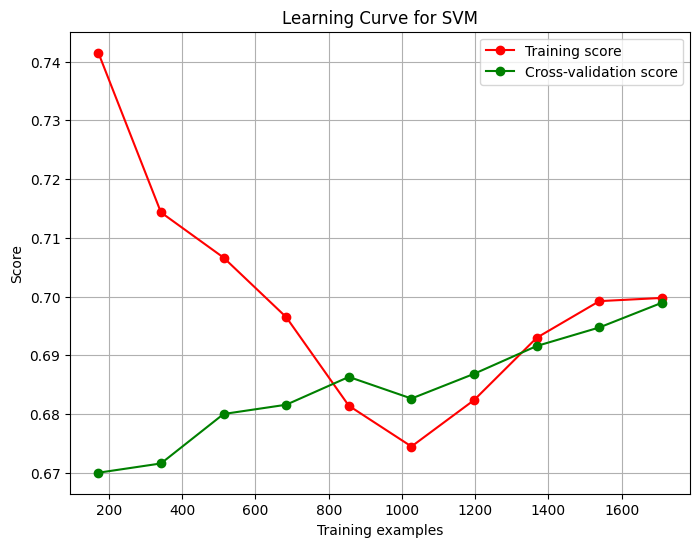

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 865, number of negative: 845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2772
[LightGBM] [Info] Number of data points in the train set: 1710, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505848 -> initscore=0.023393
[LightGBM] [Info] Start training from score 0.023393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

<Figure size 640x480 with 0 Axes>

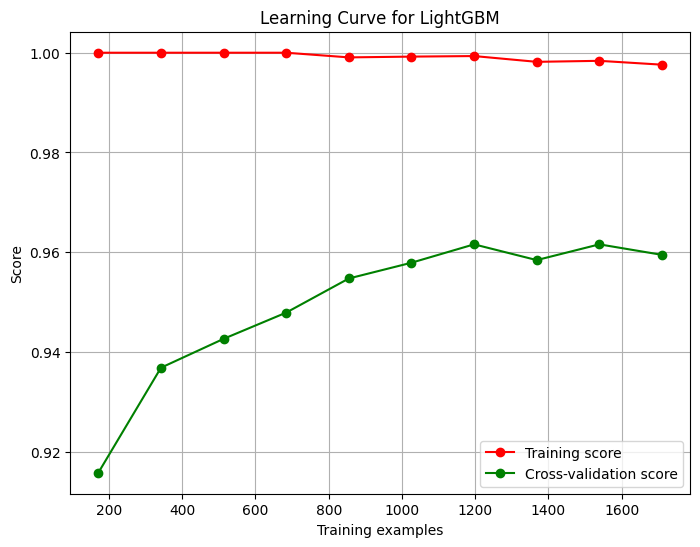

<Figure size 640x480 with 0 Axes>

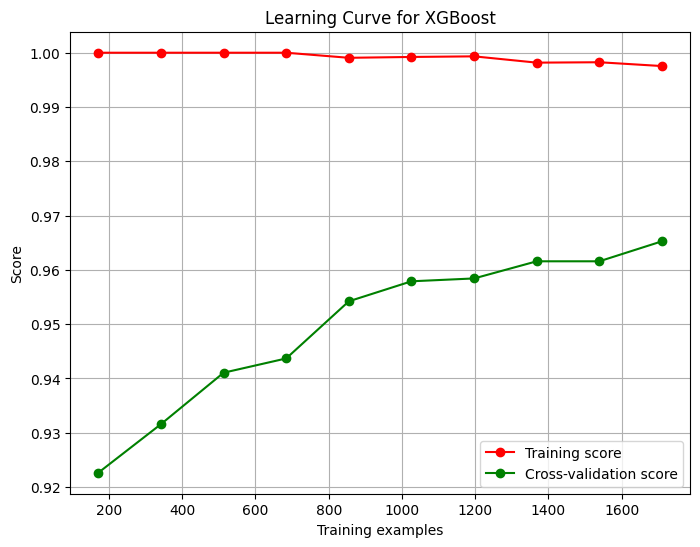

RandomForestClassifier:
Accuracy: 0.9558823529411765
Confusion Matrix:
[[229  11]
 [ 10 226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       240
           1       0.95      0.96      0.96       236

    accuracy                           0.96       476
   macro avg       0.96      0.96      0.96       476
weighted avg       0.96      0.96      0.96       476

Cross-Validation Mean Accuracy: 0.9536842105263158


SVM:
Accuracy: 0.6953781512605042
Confusion Matrix:
[[177  63]
 [ 82 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       240
           1       0.71      0.65      0.68       236

    accuracy                           0.70       476
   macro avg       0.70      0.70      0.69       476
weighted avg       0.70      0.70      0.69       476

Cross-Validation Mean Accuracy: 0.6989473684210525


LightGBM:
Accuracy: 0.960

<Figure size 640x480 with 0 Axes>

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


save_path = "/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/"

X = train_06.drop('Attrition', axis=1)
y = train_06['Attrition']

# Splitting data into train and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to be compared
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, min_samples_split=10, max_features='sqrt', random_state=42),
    'SVM': SVC(random_state=42),
    'LightGBM': lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
),
    'XGBoost': xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
),
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Cross-validation to assess mean accuracy
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross-Validation Mean Accuracy': mean_cv_score
    }

    # Save the trained model
    if name == 'LightGBM':
        joblib.dump(model, save_path + 'model_LGBMv01.pkl')
    elif name == 'XGBoost':
        joblib.dump(model, save_path + 'model_XGBv01.pkl')
    elif name == 'RandomForestClassifier':
        joblib.dump(model, save_path + 'model_RFCv01.pkl')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=kf,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    plt.tight_layout()

# Display the final results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross-Validation Mean Accuracy: {metrics['Cross-Validation Mean Accuracy']}")
    print("\n")


# 11. Results

In [100]:
test_05.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,Attrition,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox
0,31,0.0,30,305,1,111,274,2,0,22,...,1,3,4,2,1.0,0,5.720312,3.401197,1.000000,1.121386
1,2,0.0,1,63,6,40,51,1,1,13,...,0,3,2,0,0.0,1,4.143135,0.000000,2.449490,0.702167
2,19,1.0,1,5,1,143,282,1,11,23,...,1,3,4,0,1.0,0,1.609438,0.000000,1.000000,0.702167
3,16,0.0,6,66,22,114,18,5,60,16,...,1,2,2,4,0.0,0,4.189655,1.791759,4.690416,1.852865
4,9,0.0,1,4,0,151,275,1,41,14,...,1,2,1,0,0.0,0,1.386294,0.000000,0.000000,0.702167


In [101]:
test_06 = test_05.drop('Attrition', axis=1)
test_06.head()


,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,MaritalStatus_Single,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox
0,31,0.0,30,305,1,111,274,2,0,22,...,0.0,1,3,4,2,1.0,5.720312,3.401197,1.000000,1.121386
1,2,0.0,1,63,6,40,51,1,1,13,...,1.0,0,3,2,0,0.0,4.143135,0.000000,2.449490,0.702167
2,19,1.0,1,5,1,143,282,1,11,23,...,0.0,1,3,4,0,1.0,1.609438,0.000000,1.000000,0.702167
3,16,0.0,6,66,22,114,18,5,60,16,...,0.0,1,2,2,4,0.0,4.189655,1.791759,4.690416,1.852865
4,9,0.0,1,4,0,151,275,1,41,14,...,0.0,1,2,1,0,0.0,1.386294,0.000000,0.000000,0.702167


In [102]:
test_06.isnull().sum()


Age                                 0
OverTime_Yes                        0
TotalWorkingYears                   0
MonthlyIncome                       0
DistanceFromHome                    0
MonthlyRate                         0
DailyRate                           0
YearsAtCompany                      0
HourlyRate                          0
PercentSalaryHike                   0
NumCompaniesWorked                  0
JobLevel                            0
YearsWithCurrManager                0
JobInvolvement                      0
MaritalStatus_Single                0
Shift                               0
TrainingTimesLastYear               0
EnvironmentSatisfaction             0
YearsInCurrentRole                  0
BusinessTravel_Travel_Frequently    0
MonthlyIncome_log                   0
TotalWorkingYears_log               0
DistanceFromHome_sqrt               0
YearsAtCompany_boxcox               0
dtype: int64

In [103]:
import joblib
import pandas as pd

# Path to load models
load_path = "/content/drive/MyDrive/Colab Notebooks/Turnover Saúde/"

# Load saved models
model_lgbm = joblib.load(load_path + 'model_LGBMv01.pkl')
model_xgb = joblib.load(load_path + 'model_XGBv01.pkl')
model_rfc = joblib.load(load_path + 'model_RFCv01.pkl')


# Test each model and save the results
test_lgbm = model_lgbm.predict(test_06)
test_xgb = model_xgb.predict(test_06)
test_rfc = model_rfc.predict(test_06)

# Display top results for each model
print("LightGBM Predictions:\n", test_lgbm[:10])
print("XGBoost Predictions:\n", test_xgb[:10])
print("RandomForest Predictions:\n", test_rfc[:10])


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Predictions:
 [0 1 0 0 0 0 0 0 0 0]
XGBoost Predictions:
 [0 1 1 0 0 0 0 0 0 0]
RandomForest Predictions:
 [0 1 1 0 0 0 0 0 0 0]


In [104]:
# Creating DataFrames for the results
res_lgbm = test_06.copy()
res_xgb = test_06.copy()
res_rfc = test_06.copy()

# Adding the predictions as a new 'Attrition' column
res_lgbm['Attrition'] = test_lgbm
res_xgb['Attrition'] = test_xgb
res_rfc['Attrition'] = test_rfc



In [105]:
res_lgbm.head()

,Age,OverTime_Yes,TotalWorkingYears,MonthlyIncome,DistanceFromHome,MonthlyRate,DailyRate,YearsAtCompany,HourlyRate,PercentSalaryHike,...,Shift,TrainingTimesLastYear,EnvironmentSatisfaction,YearsInCurrentRole,BusinessTravel_Travel_Frequently,MonthlyIncome_log,TotalWorkingYears_log,DistanceFromHome_sqrt,YearsAtCompany_boxcox,Attrition
0,31,0.0,30,305,1,111,274,2,0,22,...,1,3,4,2,1.0,5.720312,3.401197,1.000000,1.121386,0
1,2,0.0,1,63,6,40,51,1,1,13,...,0,3,2,0,0.0,4.143135,0.000000,2.449490,0.702167,1
2,19,1.0,1,5,1,143,282,1,11,23,...,1,3,4,0,1.0,1.609438,0.000000,1.000000,0.702167,0
3,16,0.0,6,66,22,114,18,5,60,16,...,1,2,2,4,0.0,4.189655,1.791759,4.690416,1.852865,0
4,9,0.0,1,4,0,151,275,1,41,14,...,1,2,1,0,0.0,1.386294,0.000000,0.000000,0.702167,0


In [116]:
test_end = test_05


In [117]:
# For LightGBM
common_indices_lgbm = res_lgbm.index.intersection(test_end.index)
comparison_lgbm = res_lgbm.loc[common_indices_lgbm, 'Attrition'] == test_end.loc[common_indices_lgbm, 'Attrition']
accuracy_lgbm = comparison_lgbm.mean()
print(f"Accuracy of LightGBM compared to test_end: {accuracy_lgbm}")

# For XGBoost
common_indices_xgb = res_xgb.index.intersection(test_end.index)
comparison_xgb = res_xgb.loc[common_indices_xgb, 'Attrition'] == test_end.loc[common_indices_xgb, 'Attrition']
accuracy_xgb = comparison_xgb.mean()
print(f"Accuracy of XGBoost compared to test_end: {accuracy_xgb}")

# For RandomForest
common_indices_rfc = res_rfc.index.intersection(test_end.index)
comparison_rfc = res_rfc.loc[common_indices_rfc, 'Attrition'] == test_end.loc[common_indices_rfc, 'Attrition']
accuracy_rfc = comparison_rfc.mean()
print(f"Accuracy of RandomForest compared to test_end: {accuracy_rfc}")


Accuracy of LightGBM compared to test_end: 0.8958333333333334
Accuracy of XGBoost compared to test_end: 0.8898809523809523
Accuracy of RandomForest compared to test_end: 0.8928571428571429


In [118]:
from sklearn.metrics import confusion_matrix

# For LightGBM
conf_matrix_lgbm = confusion_matrix(test_end.loc[common_indices_lgbm, 'Attrition'], res_lgbm.loc[common_indices_lgbm, 'Attrition'])
print("Confusion Matrix for LightGBM:\n", conf_matrix_lgbm)

# For XGBoost
conf_matrix_xgb = confusion_matrix(test_end.loc[common_indices_xgb, 'Attrition'], res_xgb.loc[common_indices_xgb, 'Attrition'])
print("Confusion Matrix for XGBoost:\n", conf_matrix_xgb)

# For RandomForest
conf_matrix_rfc = confusion_matrix(test_end.loc[common_indices_rfc, 'Attrition'], res_rfc.loc[common_indices_rfc, 'Attrition'])
print("Confusion Matrix for RandomForest:\n", conf_matrix_rfc)


Confusion Matrix for LightGBM:
 [[275  14]
 [ 21  26]]
Confusion Matrix for XGBoost:
 [[273  16]
 [ 21  26]]
Confusion Matrix for RandomForest:
 [[270  19]
 [ 17  30]]


# 12. Conclusions Based on Updated Results
* XGBoost:
True Negatives (TN): 273
False Positives (FP): 16
False Negatives (FN): 21
True Positives (TP): 26
Accuracy: 0.8898809523809523
* LightGBM:
True Negatives (TN): 275
False Positives (FP): 14
False Negatives (FN): 21
True Positives (TP): 26
Accuracy: 0.8958333333333334
* RandomForest:
True Negatives (TN): 270
False Positives (FP): 19
False Negatives (FN): 17
True Positives (TP): 30
Accuracy: 0.8928571428571429
## Interpretation of Confusion Matrices
* True Negatives (TN):
LightGBM has the highest number of TN (275), followed by XGBoost (273) and RandomForest (270).
* False Positives (FP):
LightGBM has the lowest number of FP (14), followed by XGBoost (16) and RandomForest (19). This means that LightGBM had fewer false alarms.
* False Negatives (FN):
LightGBM and XGBoost have the same number of FN (21), while RandomForest has fewer FN (17). This indicates that RandomForest performed slightly better in identifying positive cases.
* True Positives (TP):
RandomForest has the highest number of TP (30), followed by LightGBM and XGBoost, both with 26.
## Conclusions
* XGBoost:
Presented an accuracy of 0.8899, which is slightly lower than the other two. Although it has a slightly higher number of FP and FN compared to LightGBM, it remains a reliable model.
* LightGBM:
Achieved the highest accuracy (0.8958) and had the lowest number of FP, indicating that it is the most precise model with fewer false alarms. However, it had the same number of FN as XGBoost.
* RandomForest:
Despite having an intermediate accuracy (0.8929), RandomForest stood out for having the lowest number of FN and the highest number of TP, indicating good performance in identifying positive cases. However, it had more FP compared to the other two models.
## Final Considerations
Based on the presented results:

* LightGBM is the most precise model in terms of accuracy and has the lowest number of false alarms, making it highly recommended for scenarios where precision is crucial.
* XGBoost is also a highly accurate model, with overall performance slightly lower than LightGBM, but still suitable for most scenarios.
* RandomForest showed a good balance, especially in identifying positive cases, despite having a higher number of false alarms. It may be useful in situations where the detection of true positives is a priority.





